In [1]:
import os
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from nltk.corpus import stopwords
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from nltk.stem.porter import *
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
import numpy as np
from tqdm import tqdm
import pickle
sw = stopwords.words("english")

In [2]:
def mae(target, pred):
    return np.mean(np.abs(target-pred))

In [3]:
reviews_table = pd.DataFrame()
for f in tqdm(os.listdir('./reviews/')):
    if f[0] != '.':
        table_to_add = pd.read_json('./reviews/'+f, lines = True)
        reviews_table = pd.concat([reviews_table, table_to_add])
    print(reviews_table.shape)

  0%|          | 8/2099 [00:00<00:45, 46.38it/s]

(531, 4)
(1152, 4)
(1505, 4)
(1783, 4)
(3445, 4)
(3841, 4)
(3995, 4)
(6401, 4)
(7162, 4)
(7362, 4)
(7581, 4)


  1%|          | 26/2099 [00:00<00:34, 60.63it/s]

(8184, 4)
(8295, 4)
(8429, 4)
(8779, 4)
(9085, 4)
(9525, 4)
(10138, 4)
(10455, 4)
(11659, 4)
(11771, 4)
(12014, 4)
(12444, 4)
(12915, 4)
(14474, 4)
(14601, 4)
(14805, 4)
(15004, 4)
(15632, 4)


  2%|▏         | 44/2099 [00:00<00:29, 70.65it/s]

(17852, 4)
(18029, 4)
(18310, 4)
(18569, 4)
(18943, 4)
(19251, 4)
(19361, 4)
(19493, 4)
(19665, 4)
(19928, 4)
(20229, 4)
(20415, 4)
(20955, 4)
(21198, 4)
(22386, 4)
(22854, 4)
(23576, 4)
(23865, 4)


  3%|▎         | 59/2099 [00:00<00:29, 68.62it/s]

(24807, 4)
(27176, 4)
(27305, 4)
(27663, 4)
(29830, 4)
(29956, 4)
(30342, 4)
(30479, 4)
(30815, 4)
(31370, 4)
(31618, 4)
(32157, 4)
(32324, 4)


  3%|▎         | 73/2099 [00:01<00:29, 67.63it/s]

(34393, 4)
(34496, 4)
(34621, 4)
(34863, 4)
(35716, 4)
(36396, 4)
(37304, 4)
(37861, 4)
(38643, 4)
(39075, 4)
(39215, 4)
(39351, 4)
(39680, 4)
(40238, 4)
(40769, 4)


  4%|▍         | 87/2099 [00:01<00:30, 66.74it/s]

(41066, 4)
(41226, 4)
(42112, 4)
(42371, 4)
(42729, 4)
(43023, 4)
(43470, 4)
(43672, 4)
(43951, 4)
(44371, 4)
(46172, 4)
(46622, 4)
(46912, 4)
(47065, 4)


  5%|▍         | 102/2099 [00:01<00:29, 68.85it/s]

(48057, 4)
(48170, 4)
(48322, 4)
(48964, 4)
(49544, 4)
(49857, 4)
(49982, 4)
(50788, 4)
(50918, 4)
(51667, 4)
(51775, 4)
(51898, 4)
(52027, 4)
(52143, 4)
(52833, 4)


  6%|▌         | 116/2099 [00:01<00:29, 67.01it/s]

(53549, 4)
(53692, 4)
(53792, 4)
(54082, 4)
(54635, 4)
(55217, 4)
(55384, 4)
(55592, 4)
(55824, 4)
(55949, 4)
(56178, 4)
(57228, 4)
(57767, 4)
(58246, 4)


  6%|▌         | 130/2099 [00:01<00:30, 63.74it/s]

(59294, 4)
(59709, 4)
(59891, 4)
(60028, 4)
(60316, 4)
(61066, 4)
(61258, 4)
(61394, 4)
(61519, 4)
(61656, 4)
(63029, 4)
(63565, 4)
(63755, 4)
(64114, 4)


  7%|▋         | 137/2099 [00:02<00:32, 60.20it/s]

(64231, 4)
(65707, 4)
(66001, 4)
(66607, 4)
(67666, 4)
(67827, 4)
(70218, 4)
(70330, 4)
(70548, 4)
(70906, 4)


  7%|▋         | 150/2099 [00:02<00:35, 55.11it/s]

(71127, 4)
(71315, 4)
(71495, 4)
(71733, 4)
(73524, 4)
(73704, 4)
(74077, 4)
(74575, 4)
(75010, 4)
(76381, 4)
(76778, 4)


  8%|▊         | 162/2099 [00:02<00:35, 54.71it/s]

(77529, 4)
(77645, 4)
(78011, 4)
(78208, 4)
(78380, 4)
(78888, 4)
(79038, 4)
(79166, 4)
(79929, 4)
(80028, 4)
(80484, 4)
(81180, 4)


  8%|▊         | 174/2099 [00:02<00:35, 54.80it/s]

(81571, 4)
(81708, 4)
(81978, 4)
(82158, 4)
(82287, 4)
(82404, 4)
(82526, 4)
(82969, 4)
(83592, 4)
(83861, 4)
(84132, 4)
(84651, 4)


  9%|▊         | 180/2099 [00:02<00:37, 50.53it/s]

(84943, 4)
(85468, 4)
(87412, 4)
(89046, 4)
(89191, 4)
(92267, 4)
(93551, 4)


  9%|▉         | 191/2099 [00:03<00:44, 42.66it/s]

(95526, 4)
(97024, 4)
(97145, 4)
(97691, 4)
(98564, 4)
(98685, 4)
(98833, 4)
(99012, 4)
(99312, 4)
(99452, 4)


 10%|▉         | 202/2099 [00:03<00:41, 46.20it/s]

(99645, 4)
(99833, 4)
(99970, 4)
(100793, 4)
(100951, 4)
(101090, 4)
(101558, 4)
(101927, 4)
(102277, 4)
(102518, 4)


 10%|█         | 212/2099 [00:03<00:43, 42.93it/s]

(103975, 4)
(104360, 4)
(105874, 4)
(106564, 4)
(106940, 4)
(107551, 4)
(107652, 4)
(108063, 4)
(108308, 4)


 11%|█         | 222/2099 [00:03<00:42, 43.68it/s]

(108928, 4)
(109714, 4)
(109884, 4)
(110287, 4)
(110798, 4)
(111219, 4)
(111340, 4)
(111552, 4)
(112415, 4)
(112552, 4)


 11%|█         | 227/2099 [00:04<00:45, 41.56it/s]

(112676, 4)
(115671, 4)
(115893, 4)
(116057, 4)
(116253, 4)
(117462, 4)
(117754, 4)
(117895, 4)


 11%|█▏        | 237/2099 [00:04<00:45, 40.98it/s]

(119934, 4)
(120120, 4)
(120264, 4)
(120465, 4)
(120958, 4)
(121809, 4)
(122186, 4)
(122335, 4)
(122668, 4)
(122845, 4)


 12%|█▏        | 247/2099 [00:04<00:46, 39.99it/s]

(123643, 4)
(126224, 4)
(126376, 4)
(126785, 4)
(127285, 4)
(127400, 4)
(127767, 4)
(128449, 4)


 12%|█▏        | 252/2099 [00:04<00:58, 31.54it/s]

(129623, 4)
(129871, 4)
(139226, 4)
(139358, 4)
(139582, 4)


 12%|█▏        | 262/2099 [00:04<00:50, 36.44it/s]

(139705, 4)
(140018, 4)
(140204, 4)
(140443, 4)
(140612, 4)
(140738, 4)
(141043, 4)
(141537, 4)
(141658, 4)


 13%|█▎        | 270/2099 [00:05<00:51, 35.26it/s]

(141932, 4)
(142032, 4)
(143019, 4)
(144212, 4)
(144995, 4)
(145735, 4)
(145945, 4)


 13%|█▎        | 280/2099 [00:05<00:47, 38.01it/s]

(146351, 4)
(146544, 4)
(146812, 4)
(147161, 4)
(147449, 4)
(148003, 4)
(148139, 4)
(148573, 4)
(148787, 4)
(148918, 4)


 14%|█▎        | 288/2099 [00:05<00:48, 37.43it/s]

(149186, 4)
(149835, 4)
(150632, 4)
(150790, 4)
(151278, 4)
(151658, 4)
(152247, 4)
(152797, 4)


 14%|█▍        | 292/2099 [00:05<00:48, 37.27it/s]

(153177, 4)
(153397, 4)
(154182, 4)
(154410, 4)
(155024, 4)
(155997, 4)
(156129, 4)
(156538, 4)


 14%|█▍        | 304/2099 [00:06<00:50, 35.35it/s]

(156757, 4)
(157088, 4)
(157303, 4)
(157520, 4)
(158175, 4)
(158431, 4)
(158786, 4)
(159055, 4)


 15%|█▍        | 313/2099 [00:06<00:48, 36.52it/s]

(159225, 4)
(159508, 4)
(159508, 4)
(159625, 4)
(160474, 4)
(160595, 4)
(161063, 4)
(161420, 4)
(162124, 4)


 15%|█▌        | 317/2099 [00:06<00:51, 34.62it/s]

(162542, 4)
(163670, 4)
(163855, 4)
(164099, 4)
(164461, 4)
(164754, 4)
(164883, 4)


 15%|█▌        | 325/2099 [00:06<00:50, 34.92it/s]

(165291, 4)
(165544, 4)
(165680, 4)
(165901, 4)
(166157, 4)
(166914, 4)
(167136, 4)


 16%|█▌        | 333/2099 [00:06<00:54, 32.13it/s]

(167336, 4)
(167544, 4)
(168846, 4)
(169097, 4)
(169509, 4)
(170386, 4)


 16%|█▌        | 341/2099 [00:07<00:53, 32.84it/s]

(171170, 4)
(171393, 4)
(171497, 4)
(172174, 4)
(172344, 4)
(172844, 4)
(173160, 4)
(173280, 4)


 16%|█▋        | 345/2099 [00:07<00:56, 31.04it/s]

(174084, 4)
(175368, 4)
(175947, 4)
(176057, 4)
(176291, 4)
(176616, 4)


 17%|█▋        | 353/2099 [00:07<00:56, 30.78it/s]

(177588, 4)
(177692, 4)
(178033, 4)
(178297, 4)
(178567, 4)
(179212, 4)
(179805, 4)


 17%|█▋        | 357/2099 [00:07<00:57, 30.05it/s]

(180925, 4)
(181330, 4)
(181495, 4)
(182505, 4)
(182735, 4)
(182933, 4)


 17%|█▋        | 364/2099 [00:08<01:04, 26.79it/s]

(186563, 4)
(187524, 4)
(188206, 4)
(188689, 4)
(190540, 4)
(191571, 4)


 18%|█▊        | 370/2099 [00:08<01:06, 26.14it/s]

(192594, 4)
(192694, 4)
(193025, 4)
(194151, 4)
(195131, 4)
(195278, 4)


 18%|█▊        | 376/2099 [00:08<01:08, 25.27it/s]

(195490, 4)
(195662, 4)
(198244, 4)
(198420, 4)
(199053, 4)
(199444, 4)


 18%|█▊        | 382/2099 [00:08<01:10, 24.38it/s]

(201349, 4)
(202470, 4)
(202633, 4)
(204787, 4)
(205052, 4)
(205589, 4)


 18%|█▊        | 388/2099 [00:09<01:05, 26.13it/s]

(205725, 4)
(206057, 4)
(206411, 4)
(207455, 4)
(207629, 4)
(207744, 4)


 19%|█▉        | 395/2099 [00:09<01:00, 28.05it/s]

(207869, 4)
(208036, 4)
(208660, 4)
(208790, 4)
(209617, 4)
(209913, 4)
(210052, 4)


 19%|█▉        | 402/2099 [00:09<00:59, 28.48it/s]

(211035, 4)
(211518, 4)
(211618, 4)
(211774, 4)
(212095, 4)
(212664, 4)


 19%|█▉        | 408/2099 [00:09<00:58, 28.75it/s]

(212803, 4)
(212999, 4)
(213170, 4)
(213282, 4)
(213966, 4)
(214280, 4)
(214403, 4)


 20%|█▉        | 414/2099 [00:09<01:00, 28.02it/s]

(215902, 4)
(216013, 4)
(216589, 4)
(216852, 4)
(217033, 4)
(217510, 4)


 20%|██        | 420/2099 [00:10<00:58, 28.71it/s]

(217996, 4)
(218139, 4)
(218249, 4)
(218562, 4)
(218815, 4)
(219152, 4)
(219372, 4)


 20%|██        | 427/2099 [00:10<01:00, 27.64it/s]

(220040, 4)
(220253, 4)
(221086, 4)
(222125, 4)
(222501, 4)
(222657, 4)


 21%|██        | 433/2099 [00:10<00:59, 28.03it/s]

(222809, 4)
(223274, 4)
(223724, 4)
(224174, 4)
(226260, 4)


 21%|██        | 439/2099 [00:10<01:05, 25.46it/s]

(226524, 4)
(226747, 4)
(226997, 4)
(227204, 4)
(229013, 4)


 21%|██        | 442/2099 [00:11<01:22, 20.04it/s]

(235313, 4)
(235603, 4)
(235873, 4)
(237954, 4)


 21%|██▏       | 448/2099 [00:11<01:22, 20.12it/s]

(238275, 4)
(239153, 4)
(239454, 4)
(242757, 4)
(243231, 4)
(243961, 4)


 22%|██▏       | 454/2099 [00:11<01:13, 22.33it/s]

(244183, 4)
(244371, 4)
(245077, 4)
(245678, 4)
(245939, 4)
(246473, 4)


 22%|██▏       | 460/2099 [00:11<01:10, 23.14it/s]

(247403, 4)
(247672, 4)
(247829, 4)
(248776, 4)
(249050, 4)
(249237, 4)


 22%|██▏       | 466/2099 [00:12<01:08, 23.94it/s]

(249476, 4)
(251146, 4)
(251289, 4)
(251438, 4)
(251714, 4)
(251865, 4)


 22%|██▏       | 472/2099 [00:12<01:08, 23.76it/s]

(252575, 4)
(252992, 4)
(253695, 4)
(253980, 4)
(255017, 4)


 23%|██▎       | 478/2099 [00:12<01:06, 24.55it/s]

(255176, 4)
(255540, 4)
(255650, 4)
(255853, 4)
(256405, 4)
(256626, 4)
(256761, 4)


 23%|██▎       | 484/2099 [00:12<01:05, 24.78it/s]

(257096, 4)
(257228, 4)
(258033, 4)
(258166, 4)
(258399, 4)
(258754, 4)


 23%|██▎       | 490/2099 [00:13<01:11, 22.54it/s]

(260376, 4)
(261146, 4)
(261471, 4)
(262552, 4)
(263439, 4)


 23%|██▎       | 493/2099 [00:13<01:11, 22.35it/s]

(263601, 4)
(263742, 4)
(265439, 4)
(265539, 4)
(265901, 4)


 24%|██▍       | 499/2099 [00:13<01:10, 22.77it/s]

(266252, 4)
(267459, 4)
(267658, 4)
(268090, 4)
(268334, 4)


 24%|██▍       | 505/2099 [00:13<01:13, 21.70it/s]

(270235, 4)
(270399, 4)
(270867, 4)
(272768, 4)
(273001, 4)


 24%|██▍       | 508/2099 [00:13<01:11, 22.12it/s]

(273389, 4)
(273811, 4)
(274112, 4)
(274552, 4)
(274992, 4)


 25%|██▍       | 517/2099 [00:14<01:07, 23.39it/s]

(275147, 4)
(276133, 4)
(276283, 4)
(276631, 4)
(276988, 4)
(277260, 4)
(277386, 4)


 25%|██▍       | 520/2099 [00:14<01:11, 22.18it/s]

(277623, 4)
(278856, 4)
(279696, 4)
(279846, 4)
(280824, 4)


 25%|██▌       | 526/2099 [00:14<01:09, 22.79it/s]

(280924, 4)
(281053, 4)
(281258, 4)
(281378, 4)
(281853, 4)


 25%|██▌       | 532/2099 [00:14<01:09, 22.50it/s]

(282211, 4)
(282748, 4)
(283256, 4)
(283687, 4)
(284322, 4)


 25%|██▌       | 535/2099 [00:15<01:16, 20.34it/s]

(284644, 4)
(286391, 4)
(288060, 4)


 26%|██▌       | 538/2099 [00:15<01:30, 17.18it/s]

(289776, 4)
(290262, 4)
(290425, 4)
(290813, 4)


 26%|██▌       | 542/2099 [00:15<01:45, 14.71it/s]

(291094, 4)
(292643, 4)
(292858, 4)


 26%|██▌       | 547/2099 [00:15<01:30, 17.11it/s]

(293216, 4)
(293795, 4)
(294041, 4)
(294148, 4)
(294278, 4)


 26%|██▌       | 550/2099 [00:16<01:26, 17.93it/s]

(294632, 4)
(294776, 4)
(294943, 4)
(295655, 4)


 26%|██▋       | 555/2099 [00:16<01:23, 18.50it/s]

(297115, 4)
(297416, 4)
(297533, 4)
(297648, 4)


 27%|██▋       | 559/2099 [00:16<01:35, 16.12it/s]

(298823, 4)
(299125, 4)
(301301, 4)
(303257, 4)


 27%|██▋       | 561/2099 [00:16<01:32, 16.69it/s]

(304425, 4)
(304592, 4)
(304735, 4)
(305337, 4)


 27%|██▋       | 566/2099 [00:17<01:28, 17.30it/s]

(306991, 4)
(307447, 4)
(307651, 4)
(307965, 4)


 27%|██▋       | 570/2099 [00:17<01:25, 17.90it/s]

(308737, 4)
(309079, 4)
(309697, 4)
(309913, 4)


 27%|██▋       | 576/2099 [00:17<01:22, 18.49it/s]

(310074, 4)
(311674, 4)
(311794, 4)
(312171, 4)
(312437, 4)
(312840, 4)


 28%|██▊       | 582/2099 [00:17<01:17, 19.51it/s]

(313028, 4)
(313194, 4)
(313397, 4)
(313535, 4)
(313680, 4)


 28%|██▊       | 586/2099 [00:18<01:18, 19.36it/s]

(313876, 4)
(314382, 4)
(314750, 4)
(315310, 4)


 28%|██▊       | 590/2099 [00:18<01:24, 17.90it/s]

(316503, 4)
(317370, 4)
(317745, 4)
(319116, 4)


 28%|██▊       | 593/2099 [00:18<01:22, 18.31it/s]

(319288, 4)
(319521, 4)
(320023, 4)
(321063, 4)


 28%|██▊       | 598/2099 [00:18<01:21, 18.46it/s]

(321370, 4)
(321495, 4)
(321664, 4)
(321923, 4)


 29%|██▊       | 602/2099 [00:18<01:24, 17.76it/s]

(322338, 4)
(322558, 4)
(322787, 4)
(324170, 4)
(324407, 4)


 29%|██▉       | 606/2099 [00:19<01:25, 17.42it/s]

(325068, 4)
(325650, 4)
(326650, 4)
(327037, 4)


 29%|██▉       | 610/2099 [00:19<01:24, 17.56it/s]

(327233, 4)
(327893, 4)
(328515, 4)
(328697, 4)


 29%|██▉       | 615/2099 [00:19<01:20, 18.33it/s]

(328898, 4)
(330153, 4)
(330382, 4)
(330495, 4)


 29%|██▉       | 619/2099 [00:19<01:19, 18.67it/s]

(330862, 4)
(331318, 4)
(331424, 4)
(331524, 4)


 30%|██▉       | 623/2099 [00:20<01:25, 17.28it/s]

(332097, 4)
(332301, 4)
(332830, 4)
(334556, 4)


 30%|██▉       | 627/2099 [00:20<01:26, 16.95it/s]

(334694, 4)
(335060, 4)
(336051, 4)
(336392, 4)


 30%|███       | 631/2099 [00:20<01:26, 16.94it/s]

(336562, 4)
(337171, 4)
(337621, 4)
(338488, 4)


 30%|███       | 633/2099 [00:20<01:25, 17.21it/s]

(338629, 4)
(338872, 4)
(342587, 4)


 30%|███       | 637/2099 [00:20<01:29, 16.26it/s]

(342807, 4)
(342947, 4)
(343166, 4)
(343744, 4)


 31%|███       | 641/2099 [00:21<01:32, 15.82it/s]

(345360, 4)
(346330, 4)
(346672, 4)
(347012, 4)


 31%|███       | 645/2099 [00:21<01:26, 16.76it/s]

(347305, 4)
(347471, 4)
(347581, 4)
(348498, 4)


 31%|███       | 649/2099 [00:21<01:28, 16.43it/s]

(349008, 4)
(349919, 4)
(350168, 4)
(350309, 4)


 31%|███       | 653/2099 [00:21<01:26, 16.72it/s]

(350466, 4)
(351076, 4)
(351296, 4)
(353014, 4)


 31%|███▏      | 657/2099 [00:22<01:32, 15.65it/s]

(354706, 4)
(354872, 4)
(355490, 4)
(355684, 4)


 31%|███▏      | 661/2099 [00:22<01:37, 14.82it/s]

(356133, 4)
(356626, 4)
(359158, 4)


 32%|███▏      | 665/2099 [00:22<01:32, 15.57it/s]

(359789, 4)
(360020, 4)
(360332, 4)
(360483, 4)


 32%|███▏      | 669/2099 [00:22<01:29, 15.95it/s]

(360768, 4)
(361172, 4)
(361815, 4)
(361992, 4)


 32%|███▏      | 673/2099 [00:23<01:31, 15.65it/s]

(362608, 4)
(362872, 4)
(364592, 4)
(364693, 4)


 32%|███▏      | 677/2099 [00:23<01:30, 15.69it/s]

(365892, 4)
(366285, 4)
(366409, 4)
(366827, 4)


 32%|███▏      | 679/2099 [00:23<01:29, 15.88it/s]

(367538, 4)
(367818, 4)
(371840, 4)


 33%|███▎      | 683/2099 [00:23<01:34, 14.93it/s]

(372275, 4)
(372659, 4)
(372793, 4)
(372940, 4)


 33%|███▎      | 687/2099 [00:24<01:32, 15.27it/s]

(373154, 4)
(373726, 4)
(375243, 4)
(375494, 4)


 33%|███▎      | 691/2099 [00:24<01:25, 16.47it/s]

(375732, 4)
(375837, 4)
(375960, 4)
(376691, 4)


 33%|███▎      | 695/2099 [00:24<01:28, 15.79it/s]

(377389, 4)
(377867, 4)
(378550, 4)
(378821, 4)


 33%|███▎      | 699/2099 [00:24<01:31, 15.23it/s]

(379343, 4)
(380592, 4)
(380695, 4)
(380945, 4)


 33%|███▎      | 703/2099 [00:25<01:30, 15.34it/s]

(381497, 4)
(381731, 4)
(382057, 4)
(382531, 4)


 34%|███▎      | 707/2099 [00:25<01:29, 15.55it/s]

(382712, 4)
(382835, 4)
(383072, 4)
(383261, 4)


 34%|███▍      | 711/2099 [00:25<01:36, 14.38it/s]

(384551, 4)
(384899, 4)
(386836, 4)


 34%|███▍      | 715/2099 [00:25<01:32, 14.89it/s]

(387055, 4)
(387173, 4)
(387579, 4)
(387801, 4)


 34%|███▍      | 719/2099 [00:26<01:29, 15.45it/s]

(387926, 4)
(388064, 4)
(388325, 4)
(388537, 4)


 34%|███▍      | 723/2099 [00:26<01:30, 15.13it/s]

(389559, 4)
(389922, 4)
(390115, 4)
(390524, 4)


 35%|███▍      | 725/2099 [00:26<01:30, 15.12it/s]

(390638, 4)
(391446, 4)
(391880, 4)
(392055, 4)


 35%|███▍      | 731/2099 [00:27<01:28, 15.53it/s]

(392159, 4)
(392434, 4)
(392668, 4)
(392874, 4)


 35%|███▌      | 735/2099 [00:27<01:27, 15.57it/s]

(393120, 4)
(393633, 4)
(393868, 4)
(394063, 4)


 35%|███▌      | 739/2099 [00:27<01:27, 15.57it/s]

(394167, 4)
(394526, 4)
(394681, 4)
(394983, 4)


 35%|███▌      | 743/2099 [00:27<01:26, 15.60it/s]

(395102, 4)
(395263, 4)
(395692, 4)
(395870, 4)


 36%|███▌      | 747/2099 [00:28<01:28, 15.29it/s]

(396238, 4)
(396375, 4)
(397049, 4)
(397393, 4)


 36%|███▌      | 751/2099 [00:28<01:29, 15.02it/s]

(397633, 4)
(397745, 4)
(398145, 4)
(398918, 4)


 36%|███▌      | 753/2099 [00:28<01:29, 14.99it/s]

(399650, 4)
(399782, 4)
(402093, 4)


 36%|███▌      | 757/2099 [00:28<01:35, 14.12it/s]

(402645, 4)
(402810, 4)
(403392, 4)
(403497, 4)


 36%|███▋      | 761/2099 [00:29<01:31, 14.61it/s]

(404458, 4)
(404648, 4)
(404757, 4)


 36%|███▋      | 765/2099 [00:29<01:32, 14.42it/s]

(405889, 4)
(406799, 4)
(407129, 4)
(407259, 4)


 37%|███▋      | 769/2099 [00:29<01:43, 12.91it/s]

(407813, 4)
(409416, 4)
(411963, 4)
(413009, 4)


 37%|███▋      | 771/2099 [00:29<01:41, 13.15it/s]

(414396, 4)
(414701, 4)
(415242, 4)


 37%|███▋      | 775/2099 [00:30<01:35, 13.80it/s]

(415577, 4)
(416043, 4)
(416158, 4)


 37%|███▋      | 777/2099 [00:30<01:35, 13.88it/s]

(416971, 4)
(417087, 4)
(417447, 4)


 37%|███▋      | 781/2099 [00:30<01:33, 14.04it/s]

(417639, 4)
(418075, 4)
(418764, 4)
(419311, 4)


 37%|███▋      | 785/2099 [00:30<01:33, 14.07it/s]

(420080, 4)
(420596, 4)
(421303, 4)


 38%|███▊      | 789/2099 [00:31<01:30, 14.47it/s]

(421490, 4)
(421635, 4)
(421752, 4)
(422215, 4)


 38%|███▊      | 791/2099 [00:31<01:29, 14.65it/s]

(422353, 4)
(422653, 4)
(422833, 4)


 38%|███▊      | 795/2099 [00:31<01:29, 14.60it/s]

(423865, 4)
(424012, 4)
(424155, 4)


 38%|███▊      | 797/2099 [00:31<01:31, 14.28it/s]

(425202, 4)
(425532, 4)
(426554, 4)


 38%|███▊      | 801/2099 [00:31<01:31, 14.12it/s]

(426698, 4)
(426810, 4)
(427338, 4)


 38%|███▊      | 803/2099 [00:32<01:31, 14.14it/s]

(427687, 4)
(428086, 4)
(428385, 4)


 38%|███▊      | 807/2099 [00:32<01:29, 14.50it/s]

(428642, 4)
(428813, 4)
(429103, 4)


 39%|███▊      | 811/2099 [00:32<01:28, 14.59it/s]

(429465, 4)
(429597, 4)
(430167, 4)
(430479, 4)


 39%|███▉      | 815/2099 [00:32<01:28, 14.49it/s]

(430657, 4)
(430767, 4)
(431215, 4)
(431592, 4)


 39%|███▉      | 817/2099 [00:33<01:28, 14.53it/s]

(431826, 4)
(431970, 4)
(432113, 4)
(432730, 4)


 39%|███▉      | 821/2099 [00:33<01:27, 14.63it/s]

(432847, 4)
(433143, 4)
(433304, 4)


 39%|███▉      | 825/2099 [00:33<01:27, 14.60it/s]

(433896, 4)
(434011, 4)
(434123, 4)
(434367, 4)


 39%|███▉      | 829/2099 [00:33<01:25, 14.78it/s]

(434552, 4)
(434796, 4)
(434909, 4)
(435009, 4)


 40%|███▉      | 833/2099 [00:34<01:25, 14.79it/s]

(435166, 4)
(435277, 4)
(435553, 4)


 40%|███▉      | 835/2099 [00:34<01:26, 14.58it/s]

(436011, 4)
(436152, 4)
(438092, 4)


 40%|███▉      | 839/2099 [00:34<01:33, 13.52it/s]

(439286, 4)
(439483, 4)
(440114, 4)


 40%|████      | 841/2099 [00:34<01:39, 12.67it/s]

(440545, 4)
(443133, 4)
(444301, 4)


 40%|████      | 845/2099 [00:35<01:36, 12.95it/s]

(444487, 4)
(444764, 4)
(445058, 4)


 40%|████      | 849/2099 [00:35<01:32, 13.58it/s]

(445165, 4)
(445447, 4)
(445774, 4)
(445956, 4)


 41%|████      | 851/2099 [00:35<01:33, 13.41it/s]

(446485, 4)
(447187, 4)
(447373, 4)


 41%|████      | 855/2099 [00:35<01:30, 13.76it/s]

(447730, 4)
(448326, 4)
(448499, 4)


 41%|████      | 857/2099 [00:35<01:30, 13.76it/s]

(448670, 4)
(448857, 4)
(449263, 4)


 41%|████      | 861/2099 [00:36<01:35, 13.02it/s]

(450980, 4)
(452325, 4)
(452510, 4)


 41%|████      | 863/2099 [00:36<01:34, 13.02it/s]

(452877, 4)
(453267, 4)
(453685, 4)


 41%|████▏     | 867/2099 [00:36<01:34, 13.07it/s]

(454346, 4)
(454536, 4)
(454983, 4)


 41%|████▏     | 869/2099 [00:36<01:33, 13.17it/s]

(455114, 4)
(455708, 4)
(455885, 4)


 42%|████▏     | 873/2099 [00:37<01:31, 13.45it/s]

(456271, 4)
(456480, 4)
(456698, 4)


 42%|████▏     | 875/2099 [00:37<01:30, 13.54it/s]

(456856, 4)
(457024, 4)
(457238, 4)


 42%|████▏     | 879/2099 [00:37<01:30, 13.54it/s]

(457516, 4)
(457753, 4)
(458220, 4)


 42%|████▏     | 881/2099 [00:37<01:30, 13.50it/s]

(458511, 4)
(459002, 4)
(459144, 4)


 42%|████▏     | 885/2099 [00:38<01:32, 13.07it/s]

(461653, 4)
(461878, 4)
(462223, 4)


 42%|████▏     | 887/2099 [00:38<01:33, 12.94it/s]

(463361, 4)
(463845, 4)
(464080, 4)


 42%|████▏     | 891/2099 [00:38<01:33, 12.92it/s]

(465193, 4)
(465494, 4)
(465754, 4)


 43%|████▎     | 893/2099 [00:38<01:32, 13.00it/s]

(466184, 4)
(466327, 4)
(467289, 4)


 43%|████▎     | 897/2099 [00:38<01:34, 12.78it/s]

(467515, 4)
(468258, 4)
(468406, 4)


 43%|████▎     | 899/2099 [00:39<01:32, 13.01it/s]

(468511, 4)
(468865, 4)
(469678, 4)


 43%|████▎     | 903/2099 [00:39<01:31, 13.02it/s]

(470011, 4)
(470121, 4)
(470360, 4)


 43%|████▎     | 905/2099 [00:39<01:32, 12.91it/s]

(470571, 4)
(471439, 4)
(472468, 4)


 43%|████▎     | 909/2099 [00:39<01:34, 12.65it/s]

(472966, 4)
(473128, 4)
(473449, 4)


 43%|████▎     | 911/2099 [00:40<01:35, 12.44it/s]

(474624, 4)
(474962, 4)
(475209, 4)


 44%|████▎     | 915/2099 [00:40<01:35, 12.36it/s]

(476153, 4)
(476790, 4)
(477419, 4)


 44%|████▎     | 917/2099 [00:40<01:35, 12.43it/s]

(477580, 4)
(478721, 4)
(479027, 4)


 44%|████▍     | 921/2099 [00:40<01:32, 12.73it/s]

(479885, 4)
(480016, 4)
(480163, 4)


 44%|████▍     | 923/2099 [00:41<01:32, 12.68it/s]

(480582, 4)
(480741, 4)
(482146, 4)


 44%|████▍     | 927/2099 [00:41<01:33, 12.55it/s]

(482257, 4)
(482631, 4)
(482909, 4)


 44%|████▍     | 929/2099 [00:41<01:35, 12.24it/s]

(483127, 4)
(484431, 4)
(485147, 4)


 44%|████▍     | 933/2099 [00:41<01:32, 12.58it/s]

(485692, 4)
(485811, 4)
(486035, 4)


 45%|████▍     | 935/2099 [00:41<01:31, 12.65it/s]

(486332, 4)
(486445, 4)
(486608, 4)


 45%|████▍     | 939/2099 [00:42<01:31, 12.70it/s]

(486809, 4)
(487016, 4)
(488051, 4)


 45%|████▍     | 941/2099 [00:42<01:33, 12.42it/s]

(489054, 4)
(489523, 4)
(489649, 4)


 45%|████▌     | 945/2099 [00:42<01:31, 12.61it/s]

(489868, 4)
(490009, 4)
(490621, 4)


 45%|████▌     | 947/2099 [00:42<01:29, 12.82it/s]

(490837, 4)
(491008, 4)
(491476, 4)


 45%|████▌     | 951/2099 [00:43<01:29, 12.89it/s]

(492128, 4)
(492261, 4)
(492507, 4)


 45%|████▌     | 953/2099 [00:43<01:28, 12.94it/s]

(492839, 4)
(492990, 4)
(493099, 4)


 46%|████▌     | 957/2099 [00:43<01:27, 13.12it/s]

(493267, 4)
(493526, 4)
(493652, 4)


 46%|████▌     | 959/2099 [00:43<01:29, 12.80it/s]

(494706, 4)
(495032, 4)
(495199, 4)


 46%|████▌     | 963/2099 [00:44<01:36, 11.79it/s]

(498300, 4)
(499644, 4)
(499973, 4)


 46%|████▌     | 965/2099 [00:44<01:34, 11.96it/s]

(500637, 4)
(500874, 4)
(501014, 4)


 46%|████▌     | 969/2099 [00:44<01:31, 12.41it/s]

(501169, 4)
(501429, 4)
(501629, 4)


 46%|████▋     | 971/2099 [00:44<01:30, 12.48it/s]

(502023, 4)
(502417, 4)
(502756, 4)


 46%|████▋     | 975/2099 [00:45<01:36, 11.65it/s]

(503176, 4)
(504693, 4)
(506372, 4)


 47%|████▋     | 977/2099 [00:45<01:34, 11.92it/s]

(506779, 4)
(506882, 4)
(507695, 4)


 47%|████▋     | 981/2099 [00:45<01:32, 12.03it/s]

(507976, 4)
(508891, 4)
(508997, 4)


 47%|████▋     | 983/2099 [00:45<01:30, 12.30it/s]

(509111, 4)
(509256, 4)
(509375, 4)


 47%|████▋     | 985/2099 [00:46<01:28, 12.54it/s]

(509540, 4)
(509817, 4)


 47%|████▋     | 989/2099 [00:46<01:37, 11.36it/s]

(512281, 4)
(512867, 4)
(513145, 4)


 47%|████▋     | 991/2099 [00:46<01:33, 11.81it/s]

(513258, 4)
(513371, 4)
(513620, 4)


 47%|████▋     | 995/2099 [00:46<01:32, 11.99it/s]

(513777, 4)
(513907, 4)
(515051, 4)


 47%|████▋     | 997/2099 [00:47<01:32, 11.92it/s]

(515864, 4)
(516270, 4)
(517064, 4)


 48%|████▊     | 1001/2099 [00:47<01:35, 11.56it/s]

(517182, 4)
(518672, 4)
(519138, 4)


 48%|████▊     | 1003/2099 [00:47<01:36, 11.39it/s]

(520784, 4)
(520929, 4)
(522862, 4)


 48%|████▊     | 1007/2099 [00:47<01:35, 11.41it/s]

(524221, 4)
(524650, 4)
(524813, 4)


 48%|████▊     | 1009/2099 [00:48<01:31, 11.94it/s]

(525085, 4)
(525219, 4)
(525847, 4)


 48%|████▊     | 1013/2099 [00:48<01:27, 12.40it/s]

(526220, 4)
(526578, 4)
(526690, 4)


 48%|████▊     | 1015/2099 [00:48<01:27, 12.33it/s]

(527970, 4)
(528093, 4)
(528203, 4)


 49%|████▊     | 1019/2099 [00:48<01:25, 12.66it/s]

(528820, 4)
(528955, 4)
(529110, 4)


 49%|████▊     | 1021/2099 [00:49<01:25, 12.65it/s]

(529388, 4)
(529653, 4)
(529761, 4)


 49%|████▉     | 1025/2099 [00:49<01:25, 12.50it/s]

(529996, 4)
(531377, 4)
(531572, 4)


 49%|████▉     | 1027/2099 [00:49<01:30, 11.83it/s]

(532477, 4)
(534365, 4)
(534507, 4)


 49%|████▉     | 1031/2099 [00:49<01:27, 12.26it/s]

(534694, 4)
(535048, 4)
(535886, 4)


 49%|████▉     | 1033/2099 [00:50<01:25, 12.50it/s]

(536147, 4)
(536380, 4)
(536596, 4)


 49%|████▉     | 1037/2099 [00:50<01:27, 12.18it/s]

(537723, 4)
(539225, 4)
(539400, 4)


 49%|████▉     | 1039/2099 [00:50<01:25, 12.44it/s]

(539621, 4)
(539882, 4)
(540360, 4)


 50%|████▉     | 1043/2099 [00:50<01:24, 12.50it/s]

(540724, 4)
(541191, 4)
(541353, 4)


 50%|████▉     | 1045/2099 [00:51<01:32, 11.46it/s]

(545286, 4)
(545663, 4)
(545779, 4)


 50%|████▉     | 1049/2099 [00:51<01:26, 12.16it/s]

(546002, 4)
(546133, 4)
(546289, 4)


 50%|█████     | 1051/2099 [00:51<01:24, 12.45it/s]

(546424, 4)
(546596, 4)
(546854, 4)


 50%|█████     | 1055/2099 [00:51<01:24, 12.42it/s]

(546987, 4)
(547440, 4)
(548028, 4)


 50%|█████     | 1057/2099 [00:51<01:24, 12.35it/s]

(548940, 4)
(549143, 4)
(549247, 4)


 51%|█████     | 1061/2099 [00:52<01:23, 12.41it/s]

(550312, 4)
(550489, 4)
(550815, 4)


 51%|█████     | 1063/2099 [00:52<01:23, 12.40it/s]

(551141, 4)
(551687, 4)
(551880, 4)


 51%|█████     | 1067/2099 [00:52<01:23, 12.29it/s]

(552004, 4)
(553246, 4)
(553583, 4)


 51%|█████     | 1069/2099 [00:52<01:23, 12.37it/s]

(553877, 4)
(554015, 4)
(555538, 4)


 51%|█████     | 1073/2099 [00:53<01:24, 12.13it/s]

(555745, 4)
(556371, 4)
(556551, 4)


 51%|█████     | 1075/2099 [00:53<01:23, 12.24it/s]

(556675, 4)
(557215, 4)
(557342, 4)


 51%|█████▏    | 1079/2099 [00:53<01:23, 12.26it/s]

(557620, 4)
(557859, 4)
(558079, 4)


 52%|█████▏    | 1081/2099 [00:53<01:22, 12.28it/s]

(558260, 4)
(558896, 4)
(559044, 4)


 52%|█████▏    | 1085/2099 [00:54<01:26, 11.67it/s]

(561816, 4)
(563010, 4)
(563142, 4)


 52%|█████▏    | 1087/2099 [00:54<01:25, 11.81it/s]

(563470, 4)
(563762, 4)
(564235, 4)


 52%|█████▏    | 1091/2099 [00:54<01:23, 12.04it/s]

(564470, 4)
(564880, 4)
(565214, 4)


 52%|█████▏    | 1093/2099 [00:54<01:24, 11.92it/s]

(565328, 4)
(566552, 4)
(567081, 4)


 52%|█████▏    | 1097/2099 [00:55<01:23, 11.94it/s]

(567610, 4)
(568260, 4)
(568408, 4)


 52%|█████▏    | 1099/2099 [00:55<01:22, 12.06it/s]

(569003, 4)
(569130, 4)
(569297, 4)


 53%|█████▎    | 1103/2099 [00:55<01:23, 11.92it/s]

(570065, 4)
(570286, 4)
(570914, 4)


 53%|█████▎    | 1105/2099 [00:55<01:25, 11.62it/s]

(571094, 4)
(572771, 4)
(572924, 4)


 53%|█████▎    | 1109/2099 [00:56<01:27, 11.29it/s]

(575630, 4)
(575794, 4)
(577383, 4)


 53%|█████▎    | 1111/2099 [00:56<01:25, 11.62it/s]

(577504, 4)
(577813, 4)
(578002, 4)


 53%|█████▎    | 1115/2099 [00:56<01:25, 11.45it/s]

(578561, 4)
(580568, 4)
(580792, 4)


 53%|█████▎    | 1117/2099 [00:57<01:26, 11.30it/s]

(582438, 4)
(582936, 4)
(583091, 4)


 53%|█████▎    | 1121/2099 [00:57<01:24, 11.56it/s]

(584573, 4)
(584671, 4)
(584791, 4)


 54%|█████▎    | 1123/2099 [00:57<01:23, 11.70it/s]

(584913, 4)
(585172, 4)
(585373, 4)


 54%|█████▎    | 1127/2099 [00:57<01:20, 12.04it/s]

(585782, 4)
(585890, 4)
(586007, 4)


 54%|█████▍    | 1129/2099 [00:58<01:24, 11.44it/s]

(587596, 4)
(588658, 4)
(590147, 4)


 54%|█████▍    | 1133/2099 [00:58<01:24, 11.44it/s]

(590530, 4)
(590740, 4)
(591006, 4)


 54%|█████▍    | 1135/2099 [00:58<01:22, 11.64it/s]

(591241, 4)
(591351, 4)
(591458, 4)


 54%|█████▍    | 1139/2099 [00:58<01:20, 11.87it/s]

(591664, 4)
(592208, 4)
(592418, 4)


 54%|█████▍    | 1141/2099 [00:59<01:20, 11.92it/s]

(592678, 4)
(592896, 4)
(593360, 4)


 55%|█████▍    | 1145/2099 [00:59<01:21, 11.67it/s]

(594243, 4)
(594647, 4)
(594837, 4)


 55%|█████▍    | 1147/2099 [00:59<01:20, 11.77it/s]

(595038, 4)
(595191, 4)
(595439, 4)


 55%|█████▍    | 1151/2099 [00:59<01:20, 11.72it/s]

(595840, 4)
(596291, 4)
(596582, 4)


 55%|█████▍    | 1153/2099 [01:00<01:20, 11.68it/s]

(596859, 4)
(597354, 4)
(597545, 4)


 55%|█████▌    | 1157/2099 [01:00<01:20, 11.67it/s]

(598567, 4)
(598736, 4)
(599004, 4)


 55%|█████▌    | 1159/2099 [01:00<01:19, 11.75it/s]

(599388, 4)
(599591, 4)
(599769, 4)


 55%|█████▌    | 1163/2099 [01:00<01:20, 11.63it/s]

(599995, 4)
(600231, 4)
(601162, 4)


 56%|█████▌    | 1165/2099 [01:01<01:21, 11.48it/s]

(601546, 4)
(602331, 4)
(602894, 4)


 56%|█████▌    | 1169/2099 [01:01<01:22, 11.24it/s]

(603453, 4)
(603569, 4)
(605170, 4)


 56%|█████▌    | 1171/2099 [01:01<01:24, 10.94it/s]

(606149, 4)
(607190, 4)


 56%|█████▌    | 1173/2099 [01:01<01:27, 10.52it/s]

(610275, 4)
(610593, 4)
(610953, 4)


 56%|█████▌    | 1177/2099 [01:02<01:25, 10.75it/s]

(611096, 4)
(611319, 4)
(612804, 4)


 56%|█████▌    | 1179/2099 [01:02<01:25, 10.72it/s]

(613616, 4)
(614120, 4)
(614892, 4)


 56%|█████▋    | 1183/2099 [01:02<01:25, 10.77it/s]

(616320, 4)
(616541, 4)
(617234, 4)


 56%|█████▋    | 1185/2099 [01:03<01:24, 10.86it/s]

(617886, 4)
(618271, 4)
(618975, 4)


 57%|█████▋    | 1189/2099 [01:03<01:22, 11.00it/s]

(619186, 4)
(619664, 4)
(619765, 4)


 57%|█████▋    | 1191/2099 [01:03<01:23, 10.94it/s]

(620881, 4)
(621390, 4)
(621528, 4)


 57%|█████▋    | 1195/2099 [01:03<01:21, 11.08it/s]

(621768, 4)
(622031, 4)
(622304, 4)


 57%|█████▋    | 1197/2099 [01:04<01:23, 10.79it/s]

(623647, 4)
(624231, 4)
(624606, 4)


 57%|█████▋    | 1201/2099 [01:04<01:25, 10.56it/s]

(625050, 4)
(625193, 4)
(626085, 4)


 57%|█████▋    | 1203/2099 [01:04<01:25, 10.52it/s]

(626763, 4)
(626951, 4)
(627359, 4)


 58%|█████▊    | 1207/2099 [01:05<01:25, 10.47it/s]

(627518, 4)
(627796, 4)
(628790, 4)


 58%|█████▊    | 1209/2099 [01:05<01:24, 10.48it/s]

(629052, 4)
(629572, 4)
(629899, 4)


 58%|█████▊    | 1213/2099 [01:05<01:24, 10.46it/s]

(630567, 4)
(630788, 4)
(631084, 4)


 58%|█████▊    | 1215/2099 [01:05<01:23, 10.57it/s]

(631249, 4)
(631486, 4)


 58%|█████▊    | 1217/2099 [01:06<01:25, 10.27it/s]

(633140, 4)
(633585, 4)
(633715, 4)


 58%|█████▊    | 1221/2099 [01:06<01:22, 10.59it/s]

(633925, 4)
(634052, 4)
(634266, 4)


 58%|█████▊    | 1223/2099 [01:06<01:23, 10.51it/s]

(634524, 4)
(635080, 4)
(635530, 4)


 58%|█████▊    | 1227/2099 [01:06<01:23, 10.50it/s]

(635669, 4)
(635894, 4)
(636381, 4)


 59%|█████▊    | 1229/2099 [01:07<01:23, 10.41it/s]

(637167, 4)
(637408, 4)
(637631, 4)


 59%|█████▊    | 1233/2099 [01:07<01:23, 10.42it/s]

(638490, 4)
(638772, 4)
(638890, 4)


 59%|█████▉    | 1235/2099 [01:07<01:23, 10.41it/s]

(639449, 4)
(639764, 4)
(640695, 4)


 59%|█████▉    | 1237/2099 [01:07<01:23, 10.28it/s]

(641311, 4)
(642696, 4)


 59%|█████▉    | 1241/2099 [01:08<01:25,  9.99it/s]

(644226, 4)
(644333, 4)
(645110, 4)


 59%|█████▉    | 1243/2099 [01:08<01:23, 10.23it/s]

(645321, 4)
(645447, 4)
(645948, 4)


 59%|█████▉    | 1247/2099 [01:08<01:22, 10.35it/s]

(646095, 4)
(646341, 4)
(646728, 4)


 60%|█████▉    | 1249/2099 [01:09<01:22, 10.29it/s]

(647195, 4)
(647896, 4)
(648189, 4)


 60%|█████▉    | 1251/2099 [01:09<01:23, 10.21it/s]

(648790, 4)
(650734, 4)


 60%|█████▉    | 1253/2099 [01:09<01:27,  9.65it/s]

(651687, 4)
(651823, 4)


 60%|█████▉    | 1257/2099 [01:09<01:26,  9.75it/s]

(653725, 4)
(654307, 4)
(654690, 4)
(654798, 4)


 60%|██████    | 1260/2099 [01:10<01:25,  9.82it/s]

(655718, 4)
(656342, 4)
(656554, 4)


 60%|██████    | 1264/2099 [01:10<01:23,  9.96it/s]

(657200, 4)
(657370, 4)
(657937, 4)


 60%|██████    | 1267/2099 [01:10<01:22, 10.15it/s]

(658479, 4)
(658644, 4)
(658763, 4)


 60%|██████    | 1269/2099 [01:11<01:20, 10.27it/s]

(658895, 4)
(659048, 4)


 61%|██████    | 1272/2099 [01:11<01:25,  9.71it/s]

(662037, 4)
(662208, 4)
(662491, 4)


 61%|██████    | 1274/2099 [01:11<01:23,  9.90it/s]

(662609, 4)
(662888, 4)
(663026, 4)


 61%|██████    | 1278/2099 [01:12<01:22,  9.98it/s]

(663663, 4)
(664539, 4)
(664769, 4)


 61%|██████    | 1280/2099 [01:12<01:21, 10.11it/s]

(664876, 4)
(665107, 4)
(666134, 4)


 61%|██████    | 1284/2099 [01:12<01:20, 10.14it/s]

(666399, 4)
(666554, 4)
(666889, 4)


 61%|██████▏   | 1286/2099 [01:12<01:19, 10.21it/s]

(667006, 4)
(667283, 4)
(667687, 4)


 61%|██████▏   | 1288/2099 [01:13<01:19, 10.18it/s]

(668003, 4)
(672416, 4)


 62%|██████▏   | 1291/2099 [01:13<01:25,  9.49it/s]

(672547, 4)
(672947, 4)


 62%|██████▏   | 1294/2099 [01:13<01:24,  9.56it/s]

(674522, 4)
(674826, 4)
(675027, 4)


 62%|██████▏   | 1297/2099 [01:14<01:22,  9.73it/s]

(675366, 4)
(675764, 4)
(675990, 4)


 62%|██████▏   | 1299/2099 [01:14<01:22,  9.75it/s]

(676494, 4)
(676735, 4)


 62%|██████▏   | 1302/2099 [01:14<01:22,  9.72it/s]

(677627, 4)
(677778, 4)
(677986, 4)


 62%|██████▏   | 1305/2099 [01:14<01:20,  9.91it/s]

(678548, 4)
(678696, 4)
(678877, 4)


 62%|██████▏   | 1307/2099 [01:15<01:19,  9.91it/s]

(679081, 4)
(679343, 4)
(679463, 4)


 62%|██████▏   | 1310/2099 [01:15<01:19,  9.88it/s]

(680344, 4)
(680469, 4)


 63%|██████▎   | 1312/2099 [01:15<01:23,  9.40it/s]

(681967, 4)
(682352, 4)


 63%|██████▎   | 1314/2099 [01:15<01:23,  9.43it/s]

(683196, 4)
(683766, 4)


 63%|██████▎   | 1318/2099 [01:16<01:19,  9.76it/s]

(684199, 4)
(684347, 4)
(684472, 4)
(684827, 4)


 63%|██████▎   | 1320/2099 [01:16<01:20,  9.69it/s]

(684949, 4)
(685722, 4)


 63%|██████▎   | 1322/2099 [01:16<01:19,  9.83it/s]

(685874, 4)
(686104, 4)


 63%|██████▎   | 1325/2099 [01:16<01:19,  9.72it/s]

(687179, 4)
(687313, 4)
(687636, 4)


 63%|██████▎   | 1328/2099 [01:17<01:17,  9.90it/s]

(688228, 4)
(688953, 4)
(689066, 4)


 63%|██████▎   | 1330/2099 [01:17<01:19,  9.73it/s]

(689266, 4)
(690681, 4)


 63%|██████▎   | 1332/2099 [01:17<01:18,  9.78it/s]

(690796, 4)
(690983, 4)
(691356, 4)


 64%|██████▎   | 1335/2099 [01:17<01:20,  9.53it/s]

(691523, 4)
(691646, 4)


 64%|██████▎   | 1337/2099 [01:18<01:19,  9.54it/s]

(691988, 4)
(692320, 4)


 64%|██████▍   | 1339/2099 [01:18<01:19,  9.52it/s]

(692921, 4)
(693319, 4)


 64%|██████▍   | 1342/2099 [01:18<01:19,  9.54it/s]

(693971, 4)
(694080, 4)
(694257, 4)


 64%|██████▍   | 1344/2099 [01:18<01:33,  8.12it/s]

(694583, 4)
(698624, 4)


 64%|██████▍   | 1346/2099 [01:19<01:29,  8.37it/s]

(700048, 4)
(700199, 4)


 64%|██████▍   | 1348/2099 [01:19<01:27,  8.61it/s]

(701086, 4)
(701664, 4)


 64%|██████▍   | 1350/2099 [01:19<01:24,  8.83it/s]

(701783, 4)
(703192, 4)


 64%|██████▍   | 1352/2099 [01:19<01:22,  9.05it/s]

(703374, 4)
(703894, 4)


 65%|██████▍   | 1354/2099 [01:20<01:20,  9.22it/s]

(704297, 4)
(704539, 4)


 65%|██████▍   | 1357/2099 [01:20<01:18,  9.41it/s]

(704751, 4)
(705446, 4)
(705559, 4)


 65%|██████▍   | 1359/2099 [01:20<01:18,  9.39it/s]

(706288, 4)
(706446, 4)


 65%|██████▍   | 1361/2099 [01:20<01:19,  9.34it/s]

(706790, 4)
(707256, 4)


 65%|██████▍   | 1363/2099 [01:20<01:18,  9.41it/s]

(707750, 4)
(708048, 4)


 65%|██████▌   | 1365/2099 [01:21<01:17,  9.46it/s]

(708399, 4)
(708507, 4)


 65%|██████▌   | 1368/2099 [01:21<01:18,  9.33it/s]

(708700, 4)
(709709, 4)
(709990, 4)


 65%|██████▌   | 1370/2099 [01:21<01:18,  9.30it/s]

(710933, 4)
(711045, 4)


 65%|██████▌   | 1373/2099 [01:22<01:18,  9.21it/s]

(711317, 4)
(711867, 4)
(712775, 4)


 66%|██████▌   | 1375/2099 [01:22<01:17,  9.32it/s]

(713072, 4)
(713682, 4)


 66%|██████▌   | 1377/2099 [01:22<01:19,  9.08it/s]

(714482, 4)
(715309, 4)


 66%|██████▌   | 1379/2099 [01:22<01:20,  8.99it/s]

(717453, 4)
(717572, 4)
(717729, 4)


 66%|██████▌   | 1382/2099 [01:23<01:18,  9.12it/s]

(718114, 4)
(718814, 4)


 66%|██████▌   | 1384/2099 [01:23<01:23,  8.54it/s]

(722211, 4)
(722342, 4)


 66%|██████▌   | 1387/2099 [01:23<01:17,  9.22it/s]

(722507, 4)
(722742, 4)
(722901, 4)


 66%|██████▌   | 1389/2099 [01:23<01:15,  9.38it/s]

(723266, 4)
(723405, 4)


 66%|██████▋   | 1391/2099 [01:24<01:15,  9.38it/s]

(723752, 4)
(723899, 4)


 66%|██████▋   | 1393/2099 [01:24<01:15,  9.31it/s]

(724147, 4)
(724329, 4)


 66%|██████▋   | 1395/2099 [01:24<01:24,  8.29it/s]

(726056, 4)
(727942, 4)


 67%|██████▋   | 1397/2099 [01:24<01:21,  8.59it/s]

(728478, 4)
(729193, 4)


 67%|██████▋   | 1399/2099 [01:24<01:18,  8.89it/s]

(729466, 4)
(729715, 4)


 67%|██████▋   | 1401/2099 [01:25<01:18,  8.93it/s]

(730777, 4)
(731026, 4)


 67%|██████▋   | 1403/2099 [01:25<01:18,  8.87it/s]

(731390, 4)
(731712, 4)


 67%|██████▋   | 1405/2099 [01:25<01:18,  8.82it/s]

(732028, 4)
(732184, 4)


 67%|██████▋   | 1407/2099 [01:25<01:18,  8.83it/s]

(732403, 4)
(732544, 4)


 67%|██████▋   | 1409/2099 [01:26<01:17,  8.91it/s]

(732721, 4)
(732874, 4)


 67%|██████▋   | 1411/2099 [01:26<01:15,  9.07it/s]

(732992, 4)
(733120, 4)


 67%|██████▋   | 1413/2099 [01:26<01:19,  8.65it/s]

(734193, 4)
(734317, 4)


 67%|██████▋   | 1415/2099 [01:26<01:26,  7.92it/s]

(736538, 4)
(737070, 4)


 68%|██████▊   | 1417/2099 [01:27<01:23,  8.14it/s]

(738302, 4)
(738647, 4)


 68%|██████▊   | 1419/2099 [01:27<01:20,  8.44it/s]

(739086, 4)
(739233, 4)


 68%|██████▊   | 1421/2099 [01:27<01:18,  8.65it/s]

(739711, 4)
(740041, 4)


 68%|██████▊   | 1423/2099 [01:27<01:15,  8.97it/s]

(740577, 4)
(741364, 4)


 68%|██████▊   | 1425/2099 [01:27<01:14,  8.99it/s]

(741588, 4)
(742437, 4)


 68%|██████▊   | 1427/2099 [01:28<01:11,  9.37it/s]

(742540, 4)
(742860, 4)


 68%|██████▊   | 1430/2099 [01:28<01:11,  9.32it/s]

(743176, 4)
(743366, 4)
(743892, 4)


 68%|██████▊   | 1432/2099 [01:28<01:12,  9.16it/s]

(744735, 4)
(745243, 4)


 68%|██████▊   | 1434/2099 [01:28<01:12,  9.21it/s]

(745526, 4)
(745977, 4)


 68%|██████▊   | 1436/2099 [01:29<01:10,  9.47it/s]

(746214, 4)
(746341, 4)


 69%|██████▊   | 1439/2099 [01:29<01:10,  9.34it/s]

(747012, 4)
(747333, 4)
(747858, 4)


 69%|██████▊   | 1441/2099 [01:29<01:09,  9.40it/s]

(748263, 4)
(748508, 4)


 69%|██████▊   | 1443/2099 [01:29<01:12,  9.04it/s]

(749017, 4)
(750057, 4)


 69%|██████▉   | 1445/2099 [01:30<01:09,  9.36it/s]

(750220, 4)
(750327, 4)


 69%|██████▉   | 1447/2099 [01:30<01:09,  9.37it/s]

(750567, 4)
(751107, 4)


 69%|██████▉   | 1449/2099 [01:30<01:08,  9.48it/s]

(751376, 4)
(751527, 4)


 69%|██████▉   | 1451/2099 [01:30<01:09,  9.34it/s]

(752430, 4)
(752733, 4)


 69%|██████▉   | 1453/2099 [01:30<01:07,  9.56it/s]

(752936, 4)
(753079, 4)


 69%|██████▉   | 1455/2099 [01:31<01:09,  9.30it/s]

(753917, 4)
(754811, 4)


 69%|██████▉   | 1457/2099 [01:31<01:08,  9.44it/s]

(754933, 4)
(755057, 4)


 70%|██████▉   | 1460/2099 [01:31<01:08,  9.30it/s]

(755206, 4)
(755705, 4)
(756232, 4)


 70%|██████▉   | 1462/2099 [01:31<01:12,  8.79it/s]

(756443, 4)
(758029, 4)


 70%|██████▉   | 1464/2099 [01:32<01:09,  9.14it/s]

(758421, 4)
(758642, 4)


 70%|██████▉   | 1466/2099 [01:32<01:15,  8.37it/s]

(762585, 4)
(763014, 4)


 70%|██████▉   | 1468/2099 [01:32<01:10,  8.91it/s]

(763128, 4)
(763353, 4)


 70%|███████   | 1470/2099 [01:32<01:09,  9.11it/s]

(763925, 4)
(764079, 4)


 70%|███████   | 1472/2099 [01:33<01:09,  9.07it/s]

(764457, 4)
(764924, 4)


 70%|███████   | 1474/2099 [01:33<01:07,  9.24it/s]

(765431, 4)
(765848, 4)


 70%|███████   | 1476/2099 [01:33<01:07,  9.22it/s]

(766423, 4)
(766539, 4)


 70%|███████   | 1478/2099 [01:33<01:07,  9.16it/s]

(766760, 4)
(767504, 4)


 71%|███████   | 1480/2099 [01:33<01:09,  8.92it/s]

(769010, 4)
(769174, 4)


 71%|███████   | 1482/2099 [01:34<01:07,  9.08it/s]

(769382, 4)
(769642, 4)


 71%|███████   | 1484/2099 [01:34<01:07,  9.13it/s]

(769949, 4)
(770275, 4)


 71%|███████   | 1486/2099 [01:34<01:05,  9.30it/s]

(770451, 4)
(770582, 4)


 71%|███████   | 1488/2099 [01:34<01:08,  8.89it/s]

(770776, 4)
(772036, 4)


 71%|███████   | 1490/2099 [01:35<01:06,  9.17it/s]

(772187, 4)
(772623, 4)


 71%|███████   | 1492/2099 [01:35<01:06,  9.10it/s]

(773057, 4)
(773453, 4)


 71%|███████   | 1494/2099 [01:35<01:05,  9.29it/s]

(773818, 4)
(774058, 4)


 71%|███████▏  | 1496/2099 [01:35<01:05,  9.25it/s]

(774169, 4)
(774649, 4)


 71%|███████▏  | 1498/2099 [01:35<01:05,  9.20it/s]

(775090, 4)
(775371, 4)


 71%|███████▏  | 1500/2099 [01:36<01:11,  8.39it/s]

(778036, 4)
(778498, 4)


 72%|███████▏  | 1502/2099 [01:36<01:07,  8.84it/s]

(778947, 4)
(779076, 4)


 72%|███████▏  | 1504/2099 [01:36<01:07,  8.75it/s]

(779501, 4)
(780145, 4)


 72%|███████▏  | 1506/2099 [01:36<01:05,  8.99it/s]

(780381, 4)
(780984, 4)


 72%|███████▏  | 1508/2099 [01:37<01:03,  9.24it/s]

(781173, 4)
(781359, 4)


 72%|███████▏  | 1510/2099 [01:37<01:04,  9.07it/s]

(781570, 4)
(782251, 4)


 72%|███████▏  | 1512/2099 [01:37<01:03,  9.24it/s]

(782633, 4)
(782813, 4)


 72%|███████▏  | 1514/2099 [01:37<01:05,  8.95it/s]

(782999, 4)
(783511, 4)


 72%|███████▏  | 1516/2099 [01:37<01:05,  8.96it/s]

(783750, 4)
(783921, 4)


 72%|███████▏  | 1518/2099 [01:38<01:05,  8.88it/s]

(784567, 4)
(784975, 4)


 72%|███████▏  | 1520/2099 [01:38<01:05,  8.85it/s]

(785409, 4)
(785801, 4)


 73%|███████▎  | 1522/2099 [01:38<01:08,  8.38it/s]

(787208, 4)
(788495, 4)


 73%|███████▎  | 1524/2099 [01:38<01:06,  8.63it/s]

(788929, 4)
(789174, 4)


 73%|███████▎  | 1526/2099 [01:39<01:07,  8.50it/s]

(789362, 4)
(790821, 4)


 73%|███████▎  | 1528/2099 [01:39<01:10,  8.05it/s]

(791415, 4)
(793371, 4)


 73%|███████▎  | 1530/2099 [01:39<01:10,  8.11it/s]

(793592, 4)
(795732, 4)


 73%|███████▎  | 1532/2099 [01:39<01:07,  8.40it/s]

(795846, 4)
(796130, 4)


 73%|███████▎  | 1534/2099 [01:40<01:06,  8.47it/s]

(797506, 4)
(797790, 4)


 73%|███████▎  | 1536/2099 [01:40<01:05,  8.63it/s]

(797924, 4)
(799074, 4)


 73%|███████▎  | 1538/2099 [01:40<01:08,  8.15it/s]

(799408, 4)
(801713, 4)


 73%|███████▎  | 1540/2099 [01:40<01:04,  8.73it/s]

(801835, 4)
(801940, 4)


 73%|███████▎  | 1542/2099 [01:41<01:10,  7.95it/s]

(802061, 4)
(802702, 4)


 74%|███████▎  | 1544/2099 [01:41<01:06,  8.34it/s]

(803425, 4)
(803580, 4)


 74%|███████▎  | 1546/2099 [01:41<01:03,  8.77it/s]

(804315, 4)
(805016, 4)


 74%|███████▎  | 1548/2099 [01:41<01:04,  8.57it/s]

(806078, 4)
(806565, 4)


 74%|███████▍  | 1550/2099 [01:41<01:02,  8.72it/s]

(806663, 4)
(806996, 4)


 74%|███████▍  | 1552/2099 [01:42<01:03,  8.66it/s]

(807518, 4)
(807683, 4)


 74%|███████▍  | 1554/2099 [01:42<01:02,  8.73it/s]

(807901, 4)
(808213, 4)


 74%|███████▍  | 1556/2099 [01:42<01:00,  8.93it/s]

(808345, 4)
(808467, 4)


 74%|███████▍  | 1558/2099 [01:42<00:58,  9.19it/s]

(808623, 4)
(808969, 4)


 74%|███████▍  | 1560/2099 [01:43<00:59,  9.06it/s]

(809105, 4)
(809250, 4)


 74%|███████▍  | 1562/2099 [01:43<01:00,  8.83it/s]

(809381, 4)
(810458, 4)


 75%|███████▍  | 1564/2099 [01:43<01:01,  8.68it/s]

(811370, 4)
(811509, 4)


 75%|███████▍  | 1566/2099 [01:43<01:02,  8.59it/s]

(811660, 4)
(812195, 4)


 75%|███████▍  | 1568/2099 [01:44<01:04,  8.17it/s]

(812534, 4)
(814180, 4)


 75%|███████▍  | 1570/2099 [01:44<01:03,  8.39it/s]

(814287, 4)
(814780, 4)


 75%|███████▍  | 1572/2099 [01:44<01:01,  8.59it/s]

(814903, 4)
(815641, 4)


 75%|███████▍  | 1574/2099 [01:44<01:05,  8.02it/s]

(816109, 4)
(816262, 4)


 75%|███████▌  | 1576/2099 [01:44<01:03,  8.21it/s]

(816489, 4)
(816771, 4)


 75%|███████▌  | 1578/2099 [01:45<01:07,  7.76it/s]

(817283, 4)
(818765, 4)


 75%|███████▌  | 1580/2099 [01:45<01:02,  8.36it/s]

(819196, 4)
(819452, 4)


 75%|███████▌  | 1582/2099 [01:45<01:00,  8.49it/s]

(819814, 4)
(819981, 4)


 75%|███████▌  | 1584/2099 [01:45<01:08,  7.54it/s]

(820378, 4)
(825026, 4)


 76%|███████▌  | 1586/2099 [01:46<01:03,  8.05it/s]

(825186, 4)
(825552, 4)


 76%|███████▌  | 1588/2099 [01:46<01:01,  8.26it/s]

(825944, 4)
(826159, 4)


 76%|███████▌  | 1590/2099 [01:46<01:02,  8.19it/s]

(826539, 4)
(827806, 4)


 76%|███████▌  | 1592/2099 [01:46<01:01,  8.22it/s]

(827984, 4)
(828390, 4)


 76%|███████▌  | 1594/2099 [01:47<00:59,  8.54it/s]

(828551, 4)
(828828, 4)


 76%|███████▌  | 1596/2099 [01:47<00:59,  8.46it/s]

(829481, 4)
(829599, 4)


 76%|███████▌  | 1598/2099 [01:47<00:59,  8.47it/s]

(829755, 4)
(830325, 4)


 76%|███████▌  | 1600/2099 [01:47<01:00,  8.25it/s]

(831440, 4)
(831737, 4)


 76%|███████▋  | 1602/2099 [01:48<00:59,  8.34it/s]

(832138, 4)
(832360, 4)


 76%|███████▋  | 1604/2099 [01:48<00:57,  8.54it/s]

(832562, 4)
(833664, 4)


 77%|███████▋  | 1606/2099 [01:48<00:58,  8.41it/s]

(833959, 4)
(834319, 4)


 77%|███████▋  | 1608/2099 [01:48<01:03,  7.71it/s]

(834711, 4)
(838296, 4)


 77%|███████▋  | 1610/2099 [01:49<01:01,  8.01it/s]

(838761, 4)
(839249, 4)


 77%|███████▋  | 1612/2099 [01:49<01:01,  7.97it/s]

(840190, 4)
(841128, 4)


 77%|███████▋  | 1614/2099 [01:49<00:58,  8.30it/s]

(841236, 4)
(841339, 4)


 77%|███████▋  | 1616/2099 [01:49<00:58,  8.27it/s]

(841462, 4)
(842059, 4)


 77%|███████▋  | 1618/2099 [01:50<00:59,  8.12it/s]

(842380, 4)
(842714, 4)


 77%|███████▋  | 1620/2099 [01:50<00:57,  8.38it/s]

(842838, 4)
(843317, 4)


 77%|███████▋  | 1622/2099 [01:50<00:59,  7.98it/s]

(843504, 4)
(845559, 4)


 77%|███████▋  | 1624/2099 [01:50<00:59,  7.99it/s]

(845800, 4)
(846459, 4)


 77%|███████▋  | 1626/2099 [01:51<00:58,  8.06it/s]

(847223, 4)
(847405, 4)


 78%|███████▊  | 1628/2099 [01:51<00:57,  8.21it/s]

(847802, 4)
(848034, 4)


 78%|███████▊  | 1630/2099 [01:51<00:59,  7.84it/s]

(849755, 4)
(850364, 4)


 78%|███████▊  | 1632/2099 [01:51<00:57,  8.12it/s]

(850636, 4)
(852057, 4)


 78%|███████▊  | 1634/2099 [01:52<00:58,  7.99it/s]

(852197, 4)
(853097, 4)


 78%|███████▊  | 1636/2099 [01:52<00:56,  8.25it/s]

(853259, 4)
(853514, 4)


 78%|███████▊  | 1638/2099 [01:52<00:55,  8.30it/s]

(853988, 4)
(854558, 4)


 78%|███████▊  | 1640/2099 [01:52<00:54,  8.39it/s]

(855332, 4)
(855522, 4)


 78%|███████▊  | 1642/2099 [01:53<00:56,  8.13it/s]

(855650, 4)
(856928, 4)


 78%|███████▊  | 1644/2099 [01:53<00:56,  8.09it/s]

(858345, 4)
(858518, 4)


 78%|███████▊  | 1646/2099 [01:53<00:54,  8.25it/s]

(858883, 4)
(859714, 4)


 79%|███████▊  | 1648/2099 [01:53<00:55,  8.20it/s]

(859817, 4)
(860221, 4)


 79%|███████▊  | 1650/2099 [01:54<00:54,  8.17it/s]

(860677, 4)
(861103, 4)


 79%|███████▊  | 1652/2099 [01:54<00:53,  8.39it/s]

(861305, 4)
(861431, 4)


 79%|███████▉  | 1654/2099 [01:54<00:53,  8.36it/s]

(861761, 4)
(861947, 4)


 79%|███████▉  | 1656/2099 [01:54<00:56,  7.82it/s]

(862123, 4)
(864280, 4)


 79%|███████▉  | 1658/2099 [01:55<00:57,  7.64it/s]

(866499, 4)
(866841, 4)


 79%|███████▉  | 1660/2099 [01:55<00:57,  7.70it/s]

(867007, 4)
(868226, 4)


 79%|███████▉  | 1662/2099 [01:55<00:53,  8.12it/s]

(869054, 4)
(869242, 4)


 79%|███████▉  | 1664/2099 [01:55<00:53,  8.14it/s]

(869675, 4)
(870169, 4)


 79%|███████▉  | 1666/2099 [01:55<00:53,  8.10it/s]

(870821, 4)
(871330, 4)


 79%|███████▉  | 1668/2099 [01:56<00:53,  8.05it/s]

(871596, 4)
(872865, 4)


 80%|███████▉  | 1670/2099 [01:56<00:53,  8.01it/s]

(873515, 4)
(874089, 4)


 80%|███████▉  | 1672/2099 [01:56<00:51,  8.28it/s]

(874429, 4)
(874758, 4)


 80%|███████▉  | 1674/2099 [01:56<00:50,  8.46it/s]

(874964, 4)
(875343, 4)


 80%|███████▉  | 1676/2099 [01:57<00:54,  7.83it/s]

(875590, 4)
(877560, 4)


 80%|███████▉  | 1678/2099 [01:57<00:53,  7.91it/s]

(878862, 4)
(879011, 4)


 80%|████████  | 1680/2099 [01:57<00:52,  8.04it/s]

(879420, 4)
(879606, 4)


 80%|████████  | 1682/2099 [01:58<00:57,  7.20it/s]

(879850, 4)
(882722, 4)


 80%|████████  | 1684/2099 [01:58<00:55,  7.51it/s]

(882947, 4)
(883355, 4)


 80%|████████  | 1686/2099 [01:58<00:53,  7.74it/s]

(883761, 4)
(884200, 4)


 80%|████████  | 1688/2099 [01:58<00:52,  7.77it/s]

(884627, 4)
(885314, 4)


 81%|████████  | 1690/2099 [01:59<00:50,  8.12it/s]

(885810, 4)
(886230, 4)


 81%|████████  | 1692/2099 [01:59<00:51,  7.97it/s]

(886505, 4)
(886680, 4)


 81%|████████  | 1694/2099 [01:59<00:50,  7.98it/s]

(887584, 4)
(887814, 4)


 81%|████████  | 1696/2099 [01:59<00:50,  8.06it/s]

(887956, 4)
(888363, 4)


 81%|████████  | 1698/2099 [02:00<00:50,  8.01it/s]

(888471, 4)
(888878, 4)


 81%|████████  | 1700/2099 [02:00<00:52,  7.67it/s]

(889974, 4)
(890889, 4)


 81%|████████  | 1702/2099 [02:00<00:50,  7.87it/s]

(891019, 4)
(891124, 4)


 81%|████████  | 1704/2099 [02:00<00:50,  7.82it/s]

(892585, 4)
(892724, 4)


 81%|████████▏ | 1706/2099 [02:01<00:50,  7.82it/s]

(893339, 4)
(893445, 4)


 81%|████████▏ | 1708/2099 [02:01<00:51,  7.61it/s]

(894983, 4)
(895617, 4)


 81%|████████▏ | 1710/2099 [02:01<00:50,  7.75it/s]

(895784, 4)
(896052, 4)


 82%|████████▏ | 1712/2099 [02:01<00:49,  7.86it/s]

(896608, 4)
(896741, 4)


 82%|████████▏ | 1714/2099 [02:02<00:51,  7.55it/s]

(897017, 4)
(898510, 4)


 82%|████████▏ | 1716/2099 [02:02<00:50,  7.64it/s]

(899793, 4)
(899939, 4)


 82%|████████▏ | 1718/2099 [02:02<00:49,  7.72it/s]

(900153, 4)
(900539, 4)


 82%|████████▏ | 1720/2099 [02:02<00:48,  7.79it/s]

(900692, 4)
(901102, 4)


 82%|████████▏ | 1722/2099 [02:03<00:48,  7.79it/s]

(901219, 4)
(901913, 4)


 82%|████████▏ | 1724/2099 [02:03<00:48,  7.69it/s]

(902027, 4)
(902668, 4)


 82%|████████▏ | 1726/2099 [02:03<00:48,  7.72it/s]

(903077, 4)
(903471, 4)


 82%|████████▏ | 1728/2099 [02:03<00:47,  7.75it/s]

(903577, 4)
(903961, 4)


 82%|████████▏ | 1730/2099 [02:04<00:46,  7.86it/s]

(904102, 4)
(904307, 4)


 83%|████████▎ | 1732/2099 [02:04<00:47,  7.71it/s]

(904476, 4)
(904947, 4)


 83%|████████▎ | 1734/2099 [02:04<00:46,  7.81it/s]

(905138, 4)
(905597, 4)


 83%|████████▎ | 1736/2099 [02:04<00:48,  7.47it/s]

(906071, 4)
(907517, 4)


 83%|████████▎ | 1738/2099 [02:05<00:46,  7.77it/s]

(907898, 4)
(908051, 4)


 83%|████████▎ | 1740/2099 [02:05<00:45,  7.83it/s]

(908226, 4)
(908394, 4)


 83%|████████▎ | 1742/2099 [02:05<00:45,  7.81it/s]

(908533, 4)
(908819, 4)


 83%|████████▎ | 1744/2099 [02:05<00:45,  7.88it/s]

(909173, 4)
(909323, 4)


 83%|████████▎ | 1746/2099 [02:06<00:44,  7.95it/s]

(910056, 4)
(910439, 4)


 83%|████████▎ | 1748/2099 [02:06<00:44,  7.90it/s]

(910826, 4)
(910927, 4)


 83%|████████▎ | 1750/2099 [02:06<00:46,  7.55it/s]

(911033, 4)
(912787, 4)


 83%|████████▎ | 1752/2099 [02:07<00:45,  7.68it/s]

(912947, 4)
(913048, 4)


 84%|████████▎ | 1754/2099 [02:07<00:44,  7.74it/s]

(913170, 4)
(913392, 4)


 84%|████████▎ | 1756/2099 [02:07<00:44,  7.72it/s]

(914188, 4)
(914401, 4)


 84%|████████▍ | 1758/2099 [02:07<00:44,  7.65it/s]

(914770, 4)
(915216, 4)


 84%|████████▍ | 1760/2099 [02:08<00:43,  7.79it/s]

(915345, 4)
(915766, 4)


 84%|████████▍ | 1762/2099 [02:08<00:48,  6.96it/s]

(917577, 4)
(920374, 4)


 84%|████████▍ | 1764/2099 [02:08<00:46,  7.24it/s]

(921678, 4)
(921809, 4)


 84%|████████▍ | 1766/2099 [02:08<00:44,  7.45it/s]

(922111, 4)
(922510, 4)


 84%|████████▍ | 1768/2099 [02:09<00:42,  7.73it/s]

(922847, 4)
(923002, 4)


 84%|████████▍ | 1770/2099 [02:09<00:41,  7.90it/s]

(923265, 4)
(923472, 4)


 84%|████████▍ | 1772/2099 [02:09<00:41,  7.87it/s]

(923676, 4)
(923897, 4)


 85%|████████▍ | 1774/2099 [02:09<00:44,  7.36it/s]

(924222, 4)
(925340, 4)


 85%|████████▍ | 1776/2099 [02:10<00:43,  7.46it/s]

(925888, 4)
(926268, 4)


 85%|████████▍ | 1778/2099 [02:10<00:43,  7.36it/s]

(926679, 4)
(926922, 4)


 85%|████████▍ | 1780/2099 [02:10<00:41,  7.69it/s]

(927114, 4)
(927311, 4)


 85%|████████▍ | 1782/2099 [02:10<00:40,  7.78it/s]

(927467, 4)
(927687, 4)


 85%|████████▍ | 1784/2099 [02:11<00:41,  7.61it/s]

(927787, 4)
(928365, 4)


 85%|████████▌ | 1786/2099 [02:11<00:40,  7.67it/s]

(928683, 4)
(928973, 4)


 85%|████████▌ | 1788/2099 [02:11<00:42,  7.34it/s]

(929133, 4)
(930481, 4)


 85%|████████▌ | 1790/2099 [02:12<00:43,  7.08it/s]

(932270, 4)
(932448, 4)


 85%|████████▌ | 1792/2099 [02:12<00:43,  7.10it/s]

(933130, 4)
(934392, 4)


 85%|████████▌ | 1794/2099 [02:12<00:41,  7.29it/s]

(934493, 4)
(934672, 4)


 86%|████████▌ | 1796/2099 [02:12<00:41,  7.35it/s]

(934845, 4)
(934961, 4)


 86%|████████▌ | 1798/2099 [02:13<00:40,  7.40it/s]

(935239, 4)
(935529, 4)


 86%|████████▌ | 1800/2099 [02:13<00:41,  7.19it/s]

(936393, 4)
(936979, 4)


 86%|████████▌ | 1802/2099 [02:13<00:41,  7.18it/s]

(938131, 4)
(938313, 4)


 86%|████████▌ | 1804/2099 [02:14<00:42,  6.96it/s]

(940514, 4)
(940805, 4)


 86%|████████▌ | 1806/2099 [02:14<00:46,  6.28it/s]

(941664, 4)
(945849, 4)


 86%|████████▌ | 1808/2099 [02:14<00:44,  6.60it/s]

(947451, 4)
(947873, 4)


 86%|████████▌ | 1810/2099 [02:14<00:41,  6.92it/s]

(948634, 4)
(949062, 4)


 86%|████████▋ | 1812/2099 [02:15<00:39,  7.22it/s]

(949200, 4)
(949608, 4)


 86%|████████▋ | 1814/2099 [02:15<00:38,  7.35it/s]

(950076, 4)
(950359, 4)


 87%|████████▋ | 1816/2099 [02:15<00:41,  6.83it/s]

(952377, 4)
(953320, 4)


 87%|████████▋ | 1818/2099 [02:16<00:40,  6.99it/s]

(954830, 4)
(955396, 4)


 87%|████████▋ | 1820/2099 [02:16<00:39,  7.05it/s]

(955610, 4)
(956796, 4)


 87%|████████▋ | 1822/2099 [02:16<00:38,  7.20it/s]

(956924, 4)
(957311, 4)


 87%|████████▋ | 1824/2099 [02:16<00:36,  7.47it/s]

(957633, 4)
(957751, 4)


 87%|████████▋ | 1826/2099 [02:17<00:36,  7.53it/s]

(958243, 4)
(958476, 4)


 87%|████████▋ | 1828/2099 [02:17<00:36,  7.45it/s]

(959493, 4)
(959810, 4)


 87%|████████▋ | 1830/2099 [02:17<00:37,  7.09it/s]

(959961, 4)
(961861, 4)


 87%|████████▋ | 1832/2099 [02:17<00:37,  7.11it/s]

(961990, 4)
(962735, 4)


 87%|████████▋ | 1834/2099 [02:18<00:37,  7.03it/s]

(963416, 4)
(964144, 4)


 87%|████████▋ | 1836/2099 [02:18<00:36,  7.25it/s]

(964321, 4)
(964980, 4)


 88%|████████▊ | 1838/2099 [02:18<00:35,  7.26it/s]

(965276, 4)
(966326, 4)


 88%|████████▊ | 1840/2099 [02:19<00:35,  7.39it/s]

(966477, 4)
(966667, 4)


 88%|████████▊ | 1842/2099 [02:19<00:35,  7.25it/s]

(968189, 4)
(968817, 4)


 88%|████████▊ | 1844/2099 [02:19<00:34,  7.29it/s]

(968998, 4)
(969400, 4)


 88%|████████▊ | 1846/2099 [02:19<00:34,  7.39it/s]

(969856, 4)
(969989, 4)


 88%|████████▊ | 1848/2099 [02:20<00:33,  7.40it/s]

(970099, 4)
(970492, 4)


 88%|████████▊ | 1850/2099 [02:20<00:33,  7.33it/s]

(970608, 4)
(971088, 4)


 88%|████████▊ | 1852/2099 [02:20<00:33,  7.31it/s]

(971555, 4)
(972174, 4)


 88%|████████▊ | 1854/2099 [02:20<00:33,  7.32it/s]

(972489, 4)
(972630, 4)


 88%|████████▊ | 1856/2099 [02:21<00:33,  7.15it/s]

(972757, 4)
(972907, 4)


 89%|████████▊ | 1858/2099 [02:21<00:31,  7.62it/s]

(973059, 4)
(973265, 4)


 89%|████████▊ | 1860/2099 [02:21<00:31,  7.48it/s]

(973990, 4)
(974117, 4)


 89%|████████▊ | 1862/2099 [02:22<00:32,  7.30it/s]

(974358, 4)
(974867, 4)


 89%|████████▉ | 1864/2099 [02:22<00:32,  7.25it/s]

(975149, 4)
(975481, 4)


 89%|████████▉ | 1866/2099 [02:22<00:32,  7.10it/s]

(976100, 4)
(976522, 4)


 89%|████████▉ | 1868/2099 [02:22<00:31,  7.36it/s]

(976827, 4)
(976939, 4)


 89%|████████▉ | 1870/2099 [02:23<00:31,  7.16it/s]

(977447, 4)
(977904, 4)


 89%|████████▉ | 1872/2099 [02:23<00:31,  7.27it/s]

(978149, 4)
(978306, 4)


 89%|████████▉ | 1874/2099 [02:23<00:30,  7.36it/s]

(978415, 4)
(978648, 4)


 89%|████████▉ | 1876/2099 [02:23<00:29,  7.56it/s]

(978807, 4)
(978955, 4)


 89%|████████▉ | 1878/2099 [02:24<00:29,  7.41it/s]

(979427, 4)
(979584, 4)


 90%|████████▉ | 1880/2099 [02:24<00:29,  7.34it/s]

(979733, 4)
(980068, 4)


 90%|████████▉ | 1882/2099 [02:24<00:30,  7.17it/s]

(980214, 4)
(980868, 4)


 90%|████████▉ | 1884/2099 [02:25<00:29,  7.23it/s]

(981244, 4)
(981360, 4)


 90%|████████▉ | 1886/2099 [02:25<00:28,  7.55it/s]

(981537, 4)
(981662, 4)


 90%|████████▉ | 1888/2099 [02:25<00:29,  7.18it/s]

(982159, 4)
(982856, 4)


 90%|█████████ | 1890/2099 [02:25<00:29,  7.13it/s]

(982977, 4)
(983096, 4)


 90%|█████████ | 1892/2099 [02:26<00:29,  7.11it/s]

(983325, 4)
(983585, 4)


 90%|█████████ | 1894/2099 [02:26<00:29,  7.03it/s]

(983880, 4)
(984124, 4)


 90%|█████████ | 1896/2099 [02:26<00:28,  7.03it/s]

(985566, 4)
(985802, 4)


 90%|█████████ | 1898/2099 [02:27<00:28,  7.06it/s]

(986935, 4)
(987061, 4)


 91%|█████████ | 1900/2099 [02:27<00:27,  7.25it/s]

(987284, 4)
(987436, 4)


 91%|█████████ | 1902/2099 [02:27<00:26,  7.41it/s]

(988071, 4)
(988290, 4)


 91%|█████████ | 1904/2099 [02:27<00:26,  7.37it/s]

(988797, 4)
(988966, 4)


 91%|█████████ | 1906/2099 [02:28<00:26,  7.16it/s]

(989189, 4)
(989771, 4)


 91%|█████████ | 1908/2099 [02:28<00:26,  7.17it/s]

(990428, 4)
(991095, 4)


 91%|█████████ | 1910/2099 [02:28<00:26,  7.17it/s]

(991623, 4)
(991982, 4)


 91%|█████████ | 1912/2099 [02:29<00:27,  6.88it/s]

(992552, 4)
(994360, 4)


 91%|█████████ | 1914/2099 [02:29<00:26,  7.01it/s]

(994877, 4)
(994977, 4)


 91%|█████████▏| 1916/2099 [02:29<00:26,  7.00it/s]

(996294, 4)
(996479, 4)


 91%|█████████▏| 1918/2099 [02:29<00:25,  6.98it/s]

(997290, 4)
(997397, 4)


 91%|█████████▏| 1920/2099 [02:30<00:26,  6.75it/s]

(999471, 4)
(999742, 4)


 92%|█████████▏| 1922/2099 [02:30<00:27,  6.43it/s]

(1002865, 4)
(1002987, 4)


 92%|█████████▏| 1924/2099 [02:30<00:25,  6.97it/s]

(1003233, 4)
(1003333, 4)


 92%|█████████▏| 1926/2099 [02:31<00:24,  7.12it/s]

(1003689, 4)
(1004498, 4)


 92%|█████████▏| 1928/2099 [02:31<00:26,  6.51it/s]

(1006842, 4)
(1008713, 4)


 92%|█████████▏| 1930/2099 [02:31<00:24,  6.89it/s]

(1009707, 4)
(1009872, 4)


 92%|█████████▏| 1932/2099 [02:31<00:24,  6.95it/s]

(1010023, 4)
(1010734, 4)


 92%|█████████▏| 1934/2099 [02:32<00:23,  7.09it/s]

(1011030, 4)
(1011163, 4)


 92%|█████████▏| 1936/2099 [02:32<00:23,  7.08it/s]

(1011266, 4)
(1011856, 4)


 92%|█████████▏| 1938/2099 [02:32<00:22,  7.18it/s]

(1012145, 4)
(1012273, 4)


 92%|█████████▏| 1940/2099 [02:33<00:21,  7.25it/s]

(1012814, 4)
(1012956, 4)


 93%|█████████▎| 1942/2099 [02:33<00:23,  6.73it/s]

(1013378, 4)
(1016546, 4)


 93%|█████████▎| 1944/2099 [02:33<00:22,  6.88it/s]

(1017082, 4)
(1017638, 4)


 93%|█████████▎| 1946/2099 [02:34<00:23,  6.44it/s]

(1018588, 4)
(1019145, 4)


 93%|█████████▎| 1948/2099 [02:34<00:22,  6.59it/s]

(1019995, 4)
(1020639, 4)


 93%|█████████▎| 1950/2099 [02:34<00:21,  6.80it/s]

(1020907, 4)
(1021256, 4)


 93%|█████████▎| 1952/2099 [02:34<00:21,  6.97it/s]

(1021541, 4)
(1021899, 4)


 93%|█████████▎| 1954/2099 [02:35<00:21,  6.83it/s]

(1022096, 4)
(1022980, 4)


 93%|█████████▎| 1956/2099 [02:35<00:20,  6.91it/s]

(1023245, 4)
(1023484, 4)


 93%|█████████▎| 1958/2099 [02:35<00:20,  6.75it/s]

(1023632, 4)
(1025258, 4)


 93%|█████████▎| 1960/2099 [02:36<00:20,  6.80it/s]

(1025798, 4)
(1025959, 4)


 93%|█████████▎| 1962/2099 [02:36<00:20,  6.72it/s]

(1027030, 4)
(1027491, 4)


 94%|█████████▎| 1964/2099 [02:36<00:19,  6.76it/s]

(1028383, 4)
(1028700, 4)


 94%|█████████▎| 1966/2099 [02:36<00:19,  6.73it/s]

(1028842, 4)
(1029968, 4)


 94%|█████████▍| 1968/2099 [02:37<00:18,  6.91it/s]

(1030114, 4)
(1030249, 4)


 94%|█████████▍| 1970/2099 [02:37<00:18,  6.97it/s]

(1030448, 4)
(1030608, 4)


 94%|█████████▍| 1972/2099 [02:37<00:19,  6.56it/s]

(1030722, 4)
(1033246, 4)


 94%|█████████▍| 1974/2099 [02:38<00:18,  6.62it/s]

(1033925, 4)
(1034599, 4)


 94%|█████████▍| 1976/2099 [02:38<00:18,  6.72it/s]

(1034718, 4)
(1034997, 4)


 94%|█████████▍| 1978/2099 [02:38<00:17,  6.86it/s]

(1035195, 4)
(1035316, 4)


 94%|█████████▍| 1980/2099 [02:38<00:17,  6.90it/s]

(1035622, 4)
(1036120, 4)


 94%|█████████▍| 1982/2099 [02:39<00:16,  6.91it/s]

(1036442, 4)
(1036683, 4)


 95%|█████████▍| 1984/2099 [02:39<00:17,  6.67it/s]

(1037260, 4)
(1037661, 4)


 95%|█████████▍| 1986/2099 [02:39<00:16,  6.81it/s]

(1037856, 4)
(1038609, 4)


 95%|█████████▍| 1988/2099 [02:40<00:16,  6.79it/s]

(1039081, 4)
(1039548, 4)


 95%|█████████▍| 1990/2099 [02:40<00:16,  6.78it/s]

(1040571, 4)
(1040715, 4)


 95%|█████████▍| 1992/2099 [02:40<00:15,  6.83it/s]

(1041053, 4)
(1041341, 4)


 95%|█████████▍| 1994/2099 [02:41<00:15,  6.65it/s]

(1041721, 4)
(1042337, 4)


 95%|█████████▌| 1996/2099 [02:41<00:15,  6.73it/s]

(1042952, 4)
(1043433, 4)


 95%|█████████▌| 1998/2099 [02:41<00:14,  6.76it/s]

(1043839, 4)
(1044468, 4)


 95%|█████████▌| 2000/2099 [02:41<00:14,  6.81it/s]

(1044695, 4)
(1044872, 4)


 95%|█████████▌| 2002/2099 [02:42<00:14,  6.73it/s]

(1045083, 4)
(1046313, 4)


 95%|█████████▌| 2004/2099 [02:42<00:14,  6.72it/s]

(1046672, 4)
(1047130, 4)


 96%|█████████▌| 2006/2099 [02:42<00:13,  6.71it/s]

(1048255, 4)
(1048537, 4)


 96%|█████████▌| 2008/2099 [02:43<00:13,  6.71it/s]

(1048957, 4)
(1049109, 4)


 96%|█████████▌| 2010/2099 [02:43<00:13,  6.77it/s]

(1050527, 4)
(1050749, 4)


 96%|█████████▌| 2012/2099 [02:43<00:12,  6.97it/s]

(1051320, 4)
(1051558, 4)


 96%|█████████▌| 2014/2099 [02:44<00:12,  6.69it/s]

(1051715, 4)
(1053456, 4)


 96%|█████████▌| 2016/2099 [02:44<00:13,  6.26it/s]

(1055158, 4)
(1057513, 4)


 96%|█████████▌| 2018/2099 [02:44<00:13,  6.19it/s]

(1058622, 4)
(1058825, 4)


 96%|█████████▌| 2020/2099 [02:44<00:12,  6.33it/s]

(1059741, 4)
(1060589, 4)


 96%|█████████▋| 2022/2099 [02:45<00:11,  6.45it/s]

(1060871, 4)
(1061221, 4)


 96%|█████████▋| 2024/2099 [02:45<00:11,  6.69it/s]

(1061349, 4)
(1061773, 4)


 97%|█████████▋| 2026/2099 [02:45<00:11,  6.50it/s]

(1062435, 4)
(1062870, 4)


 97%|█████████▋| 2028/2099 [02:46<00:10,  6.74it/s]

(1062971, 4)
(1063330, 4)


 97%|█████████▋| 2030/2099 [02:46<00:10,  6.84it/s]

(1063825, 4)
(1064169, 4)


 97%|█████████▋| 2032/2099 [02:46<00:09,  6.90it/s]

(1064301, 4)
(1064461, 4)


 97%|█████████▋| 2034/2099 [02:47<00:09,  6.77it/s]

(1064750, 4)
(1065015, 4)


 97%|█████████▋| 2036/2099 [02:47<00:09,  6.68it/s]

(1065154, 4)
(1065878, 4)


 97%|█████████▋| 2038/2099 [02:47<00:09,  6.10it/s]

(1070381, 4)
(1070484, 4)


 97%|█████████▋| 2040/2099 [02:48<00:09,  6.38it/s]

(1070709, 4)
(1071046, 4)


 97%|█████████▋| 2042/2099 [02:48<00:08,  6.43it/s]

(1071451, 4)
(1071983, 4)


 97%|█████████▋| 2044/2099 [02:48<00:08,  6.56it/s]

(1072121, 4)
(1072304, 4)


 97%|█████████▋| 2046/2099 [02:48<00:08,  6.60it/s]

(1072817, 4)
(1073167, 4)


 98%|█████████▊| 2048/2099 [02:49<00:07,  6.43it/s]

(1075156, 4)
(1075460, 4)


 98%|█████████▊| 2050/2099 [02:49<00:07,  6.62it/s]

(1075703, 4)
(1075809, 4)


 98%|█████████▊| 2052/2099 [02:49<00:07,  6.55it/s]

(1076355, 4)
(1076890, 4)


 98%|█████████▊| 2054/2099 [02:50<00:07,  6.40it/s]

(1077557, 4)
(1078304, 4)


 98%|█████████▊| 2056/2099 [02:50<00:06,  6.51it/s]

(1078577, 4)
(1079193, 4)


 98%|█████████▊| 2058/2099 [02:50<00:06,  6.62it/s]

(1079501, 4)
(1079621, 4)


 98%|█████████▊| 2060/2099 [02:51<00:05,  6.56it/s]

(1079844, 4)
(1080227, 4)


 98%|█████████▊| 2062/2099 [02:51<00:05,  6.52it/s]

(1081181, 4)
(1081397, 4)


 98%|█████████▊| 2064/2099 [02:51<00:05,  6.47it/s]

(1081503, 4)
(1081885, 4)


 98%|█████████▊| 2066/2099 [02:51<00:04,  6.76it/s]

(1082219, 4)
(1083060, 4)


 99%|█████████▊| 2068/2099 [02:52<00:04,  6.64it/s]

(1084249, 4)
(1084348, 4)


 99%|█████████▊| 2070/2099 [02:52<00:04,  6.51it/s]

(1084754, 4)
(1084984, 4)


 99%|█████████▊| 2072/2099 [02:52<00:04,  6.61it/s]

(1085101, 4)
(1085261, 4)


 99%|█████████▉| 2074/2099 [02:53<00:03,  6.35it/s]

(1086709, 4)
(1087433, 4)


 99%|█████████▉| 2076/2099 [02:53<00:03,  6.51it/s]

(1087648, 4)
(1087816, 4)


 99%|█████████▉| 2078/2099 [02:53<00:03,  6.53it/s]

(1088043, 4)
(1088427, 4)


 99%|█████████▉| 2080/2099 [02:54<00:02,  6.65it/s]

(1088618, 4)
(1088816, 4)


 99%|█████████▉| 2082/2099 [02:54<00:02,  6.59it/s]

(1088922, 4)
(1089140, 4)


 99%|█████████▉| 2084/2099 [02:54<00:02,  6.47it/s]

(1089915, 4)
(1090252, 4)


 99%|█████████▉| 2086/2099 [02:55<00:01,  6.56it/s]

(1090464, 4)
(1090732, 4)


 99%|█████████▉| 2088/2099 [02:55<00:01,  6.29it/s]

(1090845, 4)
(1092699, 4)


100%|█████████▉| 2090/2099 [02:55<00:01,  6.29it/s]

(1093069, 4)
(1093774, 4)


100%|█████████▉| 2092/2099 [02:56<00:01,  6.40it/s]

(1094391, 4)
(1094539, 4)


100%|█████████▉| 2094/2099 [02:56<00:00,  6.53it/s]

(1094654, 4)
(1094817, 4)


100%|█████████▉| 2096/2099 [02:56<00:00,  6.29it/s]

(1094934, 4)
(1096944, 4)


100%|█████████▉| 2098/2099 [02:56<00:00,  6.29it/s]

(1097504, 4)
(1097899, 4)


100%|██████████| 2099/2099 [02:57<00:00,  6.33it/s]

(1098176, 4)


In [4]:
# reviews_table = pd.read_json('reviews/bi-rite-creamery-san-francisco.json', lines=True)
reviews_table.reviewRating = reviews_table.reviewRating.apply(lambda d: d['ratingValue'])

In [5]:
reviews_table.reviewRating.value_counts() / len(reviews_table.index)

5    0.374535
4    0.329157
3    0.148774
2    0.077021
1    0.070513
Name: reviewRating, dtype: float64

In [6]:
# Make stratified sample
# 35% 5's, 25% 4's, 20% 3's, 10% 2's, 10% 1's
weight_5 = 0.35
weight_4 = 0.35
weight_3 = 0.15
weight_2 = 0.075
weight_1 = 0.075

num_1 = reviews_table[reviews_table.reviewRating == 1].shape[0]
num_2 = reviews_table[reviews_table.reviewRating == 2].shape[0]
num_3 = reviews_table[reviews_table.reviewRating == 3].shape[0]
num_4 = reviews_table[reviews_table.reviewRating == 4].shape[0]
num_5 = reviews_table[reviews_table.reviewRating == 5].shape[0]
sample_size = min(num_1 * 1/weight_1, num_2 * 1/weight_2, num_3 * 1/weight_3, num_4 * 1/weight_4, num_5 * 1/weight_5)


sample_1 = reviews_table[reviews_table.reviewRating == 1].sample(int(sample_size * weight_1))
sample_2 = reviews_table[reviews_table.reviewRating == 2].sample(int(sample_size * weight_2))
sample_3 = reviews_table[reviews_table.reviewRating == 3].sample(int(sample_size * weight_3))
sample_4 = reviews_table[reviews_table.reviewRating == 4].sample(int(sample_size * weight_4))
sample_5 = reviews_table[reviews_table.reviewRating == 5].sample(int(round(sample_size * weight_5)))

stratified_reviews = pd.concat([sample_1, sample_2, sample_3, sample_4, sample_5])
stratified_reviews.shape

(1032480, 4)

In [7]:
vectorizer = CountVectorizer(stop_words = sw, ngram_range=(1,1))
X = vectorizer.fit_transform(stratified_reviews.description)
X.shape

(1032480, 236343)

In [101]:
# Stemmer for countvectorizer
stemmer = PorterStemmer()
analyzer = CountVectorizer().build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = CountVectorizer(analyzer=stemmed_words, stop_words = sw)
X = stem_vectorizer.fit_transform(stratified_reviews.description)

KeyboardInterrupt: 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, stratified_reviews.reviewRating, test_size=0.1, random_state=42)

# Linear Model

In [12]:
lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [13]:
y_pred = lm.predict(X_test)
y_pred = np.round(y_pred)
mae(y_pred, y_test)

0.7089870990237099

(array([15426., 15603., 31056., 72201., 72210.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

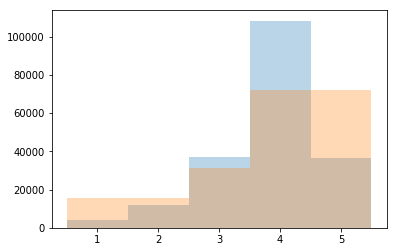

In [14]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

# Random Forest

In [15]:
clf = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [16]:
y_pred = clf.predict(X_test)
y_pred = np.round(y_pred)
mae(y_pred, y_test)

0.914986246706958

(array([15426., 15603., 31056., 72201., 72210.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

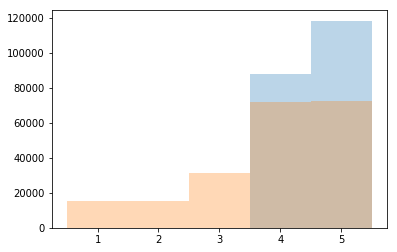

In [17]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

# Logistic Regression

In [9]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [10]:
y_pred = clf.predict(X_test)
mae(y_pred, y_test)

0.4659944986827832

In [11]:
pd.Series(y_pred).value_counts()

5    39169
4    38516
3    11786
1     7586
2     6191
dtype: int64

(array([ 7692.,  7846., 15477., 36064., 36169.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

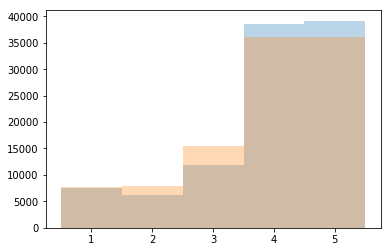

In [12]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

## Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train.toarray(), y_train)

In [ ]:
y_pred = clf.predict(X_test.toarray())
mae(y_pred, y_test)

In [ ]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

## SVM

In [22]:
clf = LinearSVC(random_state=0, tol=1e-5)

In [23]:
clf.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [24]:
y_pred = clf.predict(X_test)
mae(y_pred, y_test)

0.5360442817294282

(array([15426., 15603., 31056., 72201., 72210.]),
 array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 <a list of 5 Patch objects>)

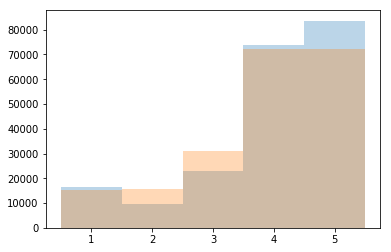

In [25]:
plt.hist(y_pred, bins = np.arange(0.5,6.5,1), alpha = 0.3)
plt.hist(y_test, bins = np.arange(0.5,6.5,1), alpha = 0.3)

In [37]:
vectorizer.transform(['This is good food, yes please!']).shape

(1, 11306306)

In [38]:
vectorizer

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 2), preprocessor=None,
        stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs',... 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"],
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [13]:
filename = open('./term_doc_matrix.sav', 'wb')
pickle.dump(vectorizer, filename)

In [15]:
filename = open('./logisticRegClassification.sav', 'wb')
pickle.dump(clf, filename)